In [1]:
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from utils import plot_utils

In [2]:
logs_dir = 'final_logs'
df = plot_utils.load_results(logs_dir)
metric_choice = 'best_ts_f1_score'

In [3]:
def get_readable_name(experiment_name):
    """Convert internal experiment names to more readable formats for display.

    Parameters:
    -----------
    experiment_name : str
        The original experiment name

    Returns:
    --------
    str
        The readable name for display in plots and tables
    """
    # Special case for LSTM models to avoid merging LSTM-P and LSTM-AE
    if 'lstm_ae' in experiment_name.lower():
        return 'LSTM-AE'
    elif 'lstm_p' in experiment_name.lower() or experiment_name.lower() == 'lstm':
        return 'LSTM-P'

    # For other models, extract just the model name part (before any underscore)
    if '_' in experiment_name:
        model_name = experiment_name.split('_')[0]
    else:
        model_name = experiment_name

    # Define the mapping dictionary
    name_mapping = {
        'anomaly': 'Anomaly Transformer',
        'anomaly_transformer': 'Anomaly Transformer',
        'kmeans': 'KMeans',
        'eif': 'EIF',
        'timesnet': 'Timesnet',
        'donut': 'Donut',
        'fedformer': 'FEDformer',
        'gru': 'GRU-GMM-VAE',
        'gru_gmm_vae': 'GRU-GMM-VAE',
        'gdn': 'GDN',
        'beatgan': 'BeatGAN'
    }

    # Return the mapped name if available, otherwise return the original
    return name_mapping.get(model_name.lower(), model_name)

In [4]:
def plot_zn_comparison_per_experiment(df, dataset, test_id):
    normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=[test_id])
    zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=[test_id])

    # Create more readable labels using get_readable_name
    normal_data_with_labels = normal_data.copy()
    zero_data_with_labels = zero_data.copy()
    # Add readable name column
    normal_data_with_labels['readable_name'] = normal_data_with_labels['experiment'].apply(get_readable_name)
    zero_data_with_labels['readable_name'] = zero_data_with_labels['experiment'].apply(get_readable_name)

    plt.figure(figsize=(12, 8))
    preview_test_id = test_id+1 if dataset == 'smd' else test_id
    plt.title(f'{dataset.upper()} - {preview_test_id}')
    plt.scatter(zero_data_with_labels['readable_name'], zero_data_with_labels['score'], color='blue', label='Zero-shot', s=80, alpha=0.7)
    plt.scatter(normal_data_with_labels['readable_name'], normal_data_with_labels['score'], color='red', label='Normal', s=80, alpha=0.7)
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

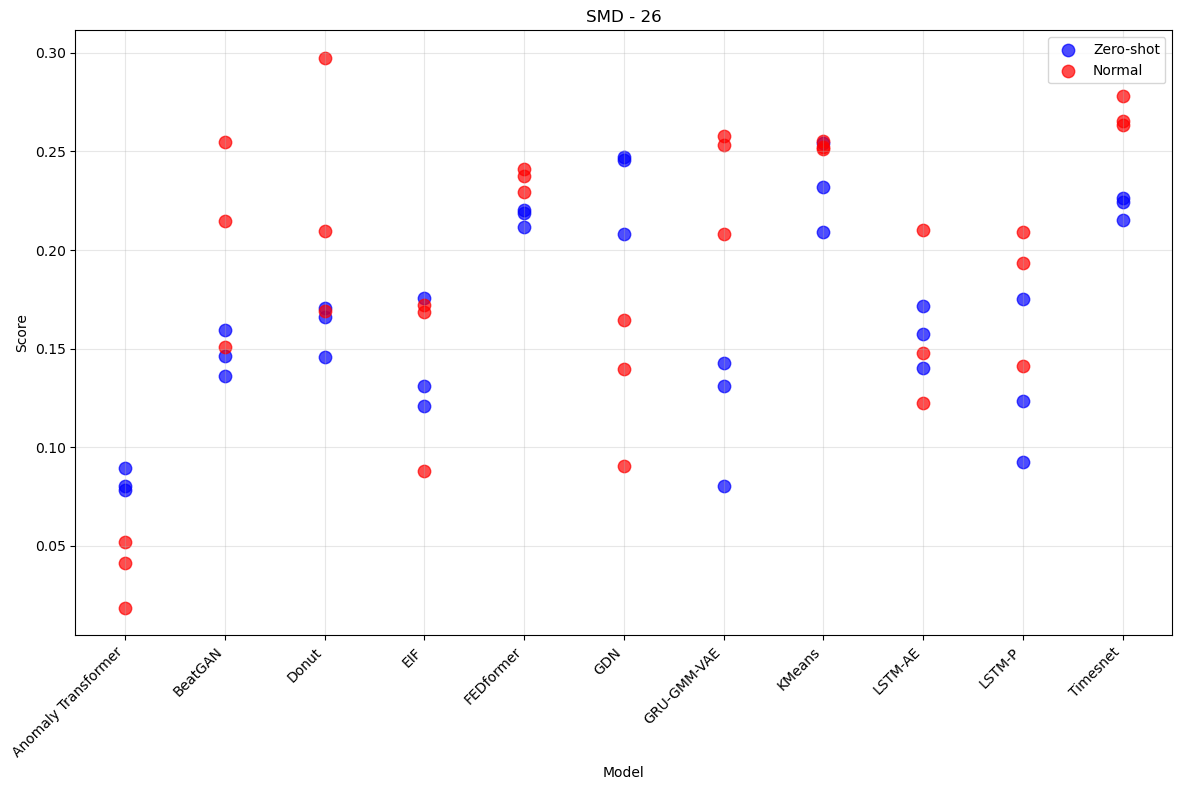

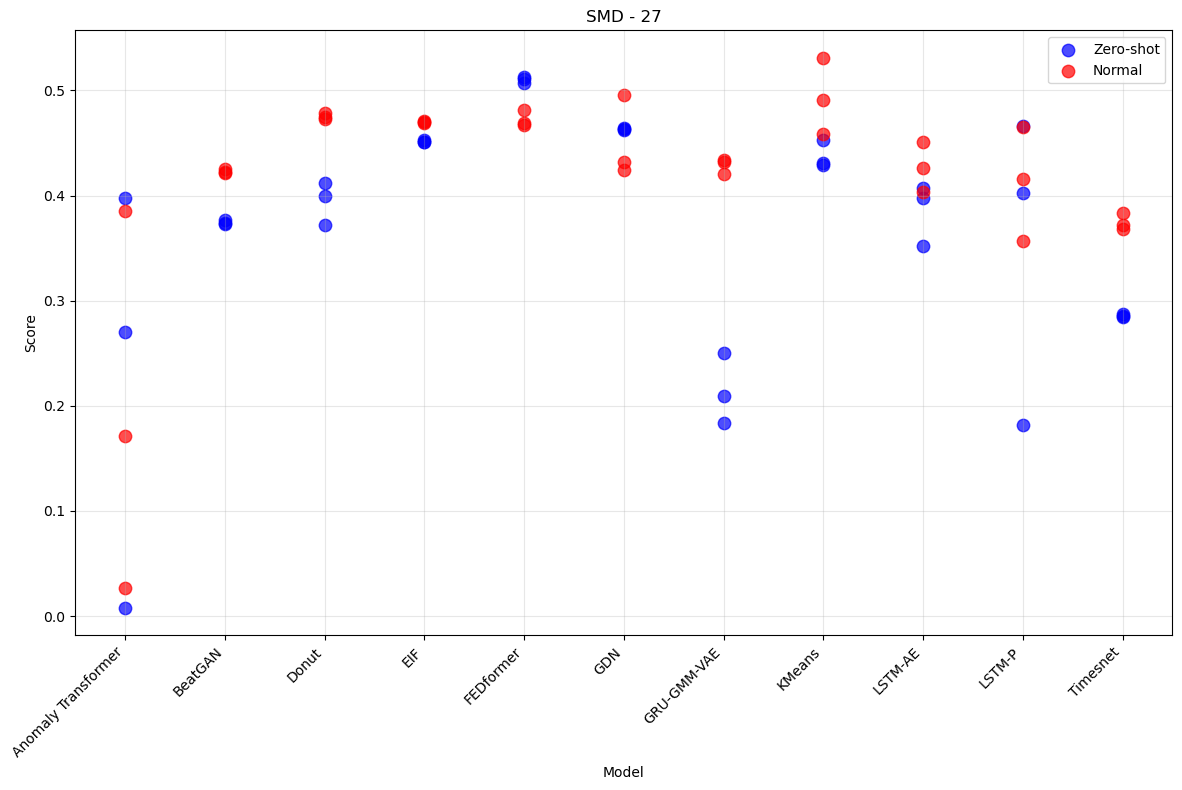

In [5]:
plot_zn_comparison_per_experiment(df, 'smd', 25)
plot_zn_comparison_per_experiment(df, 'smd', 26)

In [6]:
def plot_anomaly_graphs(log_dir_glob):
    img_paths = glob.glob(log_dir_glob)
    num_cols = 2
    fig, axs = plt.subplots(math.ceil(len(img_paths)/num_cols), num_cols, figsize=(12, 16))
    for ind, img_path in enumerate(img_paths):
        img = mpimg.imread(img_path)
        axs[ind//num_cols, ind%num_cols].set_title(img_path[11:img_path.find('version')-1])
        axs[ind//num_cols, ind%num_cols].imshow(img)
        axs[ind//num_cols, ind%num_cols].axis('off')
    for ind in range(len(img_paths), len(axs.flat)):
        axs[ind//num_cols, ind%num_cols].axis('off')
    plt.subplots_adjust(left=0.1, right=1.2, top=0.2, bottom=0.1, wspace=0.2, hspace=0.1)
    plt.tight_layout()
    plt.show()

In [7]:
#plot_anomaly_graphs('final_logs/*smd_25*/version_0/plots/anomaly_0.png')

In [8]:
def plot_zn_comparison_per_dataset(df, dataset, test_id):
    normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=[test_id])
    zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=[test_id])

    data_to_plot = [zero_data['score'].tolist(), normal_data['score'].tolist()]
    labels = ['Zero-shot', 'Normal']

    plt.figure()
    plt.boxplot(data_to_plot, labels=labels)
    plt.xlabel('Experiment')
    plt.ylabel('Score')
    plt.title(f'Comparing Zero-shot and Normal on {dataset.upper()}-{test_id}')
    plt.show()


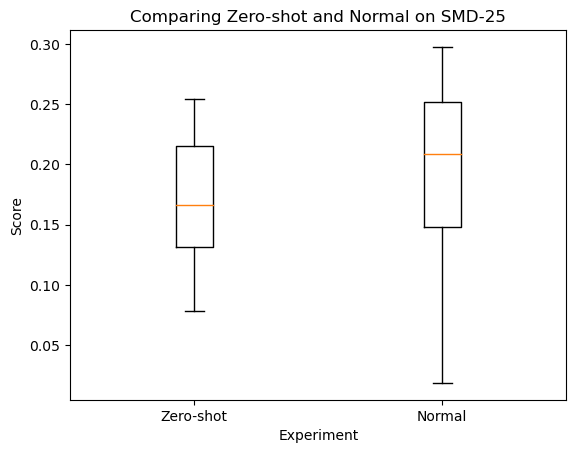

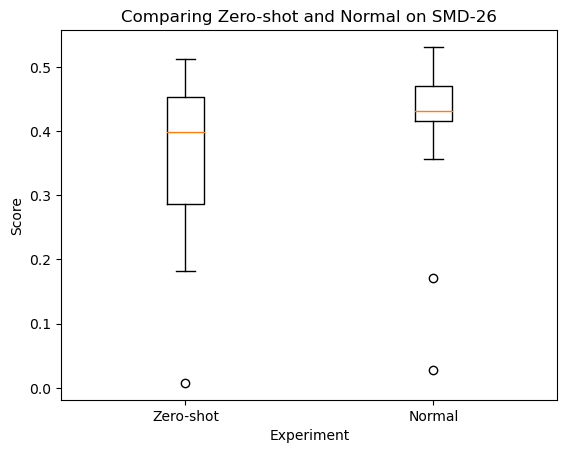

In [9]:
plot_zn_comparison_per_dataset(df, 'smd', 25)
plot_zn_comparison_per_dataset(df, 'smd', 26)

In [10]:
def plot_modelwise_zn_comparison(df, dataset, test_ids):
    normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
    normal_means_data = normal_data.groupby('experiment').mean()
    zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)
    zero_means_data = zero_data.groupby('experiment').mean()
    difference = zero_means_data - normal_means_data
    plt.figure()
    plt.title(f'Zero-shot to Normal score variation {dataset.upper()}')
    plt.bar(difference.index, difference['score'])
    plt.xlabel('Experiment')
    plt.ylabel('Score Difference')
    plt.show()


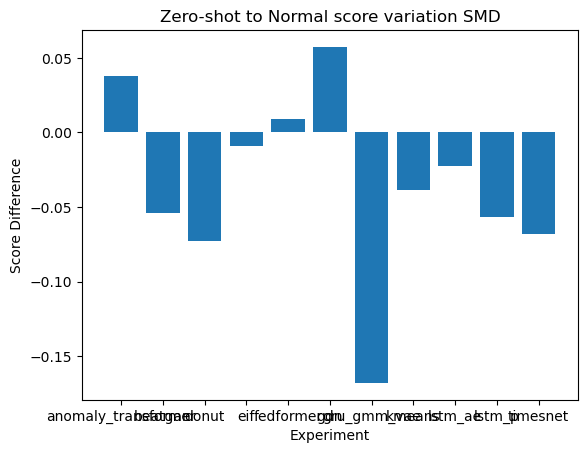

In [11]:
plot_modelwise_zn_comparison(df, 'smd', [25, 26])
# plot_modelwise_zn_comparison(df, 'smd', 26)
# normal_data = plot_utils.extract_results(df, dataset='smd', type='normal', test_ids=[26])
# normal_means_data = normal_data.groupby('experiment').mean()
# zero_data = plot_utils.extract_results(df, dataset='smd', type='zero', test_ids=[26])
# zero_means_data = zero_data.groupby('experiment').mean()
# print(zero_means_data - normal_means_data)
# print(normal_data)

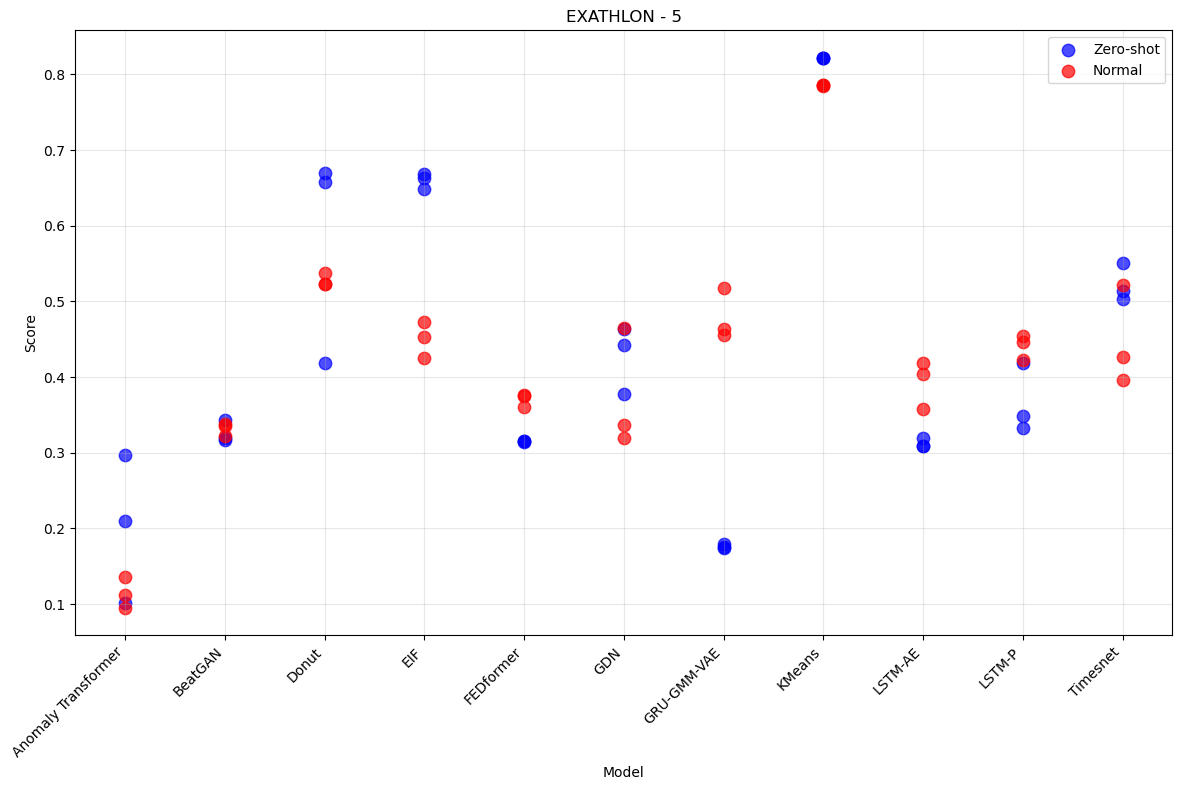

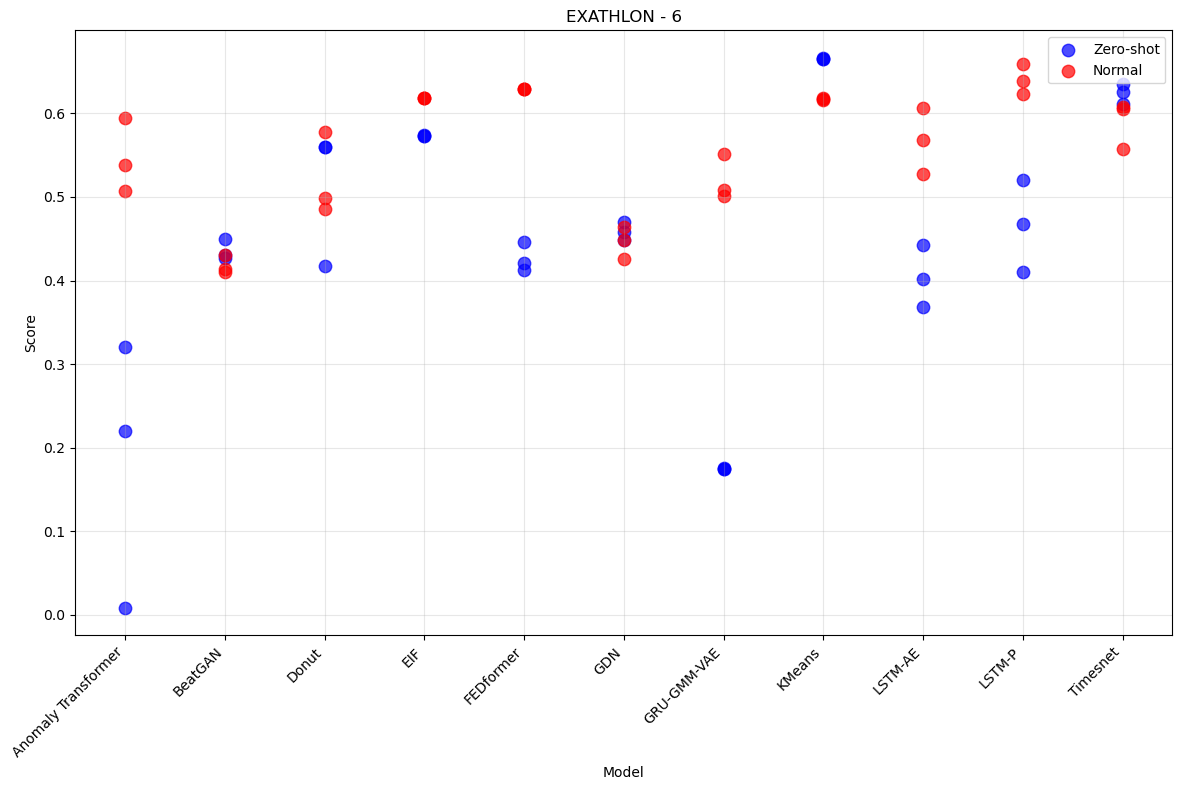

In [12]:
plot_zn_comparison_per_experiment(df, 'exathlon', 5)
plot_zn_comparison_per_experiment(df, 'exathlon', 6)

In [13]:
#plot_anomaly_graphs('final_logs/*exathlon_5*/version_0/plots/full.png')

In [14]:
normal_data = plot_utils.extract_results(df, dataset='exathlon', type='normal', test_ids=[6])
normal_means_data = normal_data.groupby('experiment').mean()
zero_data = plot_utils.extract_results(df, dataset='exathlon', type='zero', test_ids=[6])
zero_means_data = zero_data.groupby('experiment').mean()
print(zero_means_data - normal_means_data)

                        score
experiment                   
anomaly_transformer -0.363683
beatgan              0.018034
donut               -0.008430
eif                 -0.044635
fedformer           -0.202807
gdn                  0.012528
gru_gmm_vae         -0.345197
kmeans               0.048189
lstm_ae             -0.163136
lstm_p              -0.174087
timesnet             0.034219


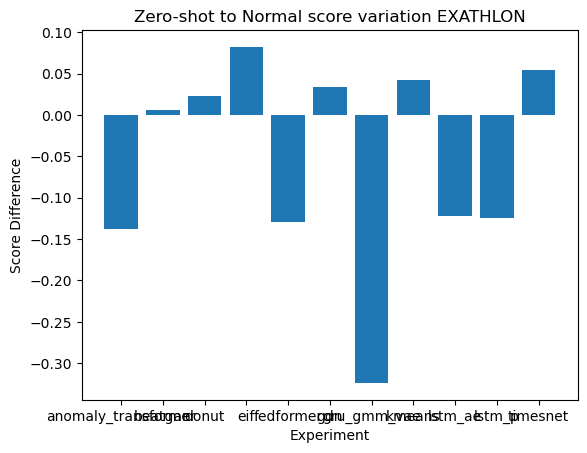

In [15]:
plot_modelwise_zn_comparison(df, 'exathlon', [5, 6])
# plot_modelwise_zn_comparison(df, 'exathlon', 6)


In [16]:
def plot_experiment_comparison(df, dataset, test_ids, sort_by='diff'):
    # Extract data for normal and zero-shot approaches
    normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
    zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)

    # Get unique experiments
    experiments = sorted(normal_data['experiment'].unique())

    # Calculate statistics for each experiment
    stats_data = []
    for exp in experiments:
        normal_scores = normal_data[normal_data['experiment'] == exp]['score']
        zero_scores = zero_data[zero_data['experiment'] == exp]['score']

        # Get readable name for experiment
        readable_name = get_readable_name(exp)

        stats_data.append({
            'experiment': exp,
            'readable_name': readable_name,
            'normal_mean': normal_scores.mean(),
            'zero_mean': zero_scores.mean(),
            'diff': zero_scores.mean() - normal_scores.mean()
        })

    # Create DataFrame from stats
    stats_df = pd.DataFrame(stats_data)

    # Sort by chosen method
    if sort_by == 'diff':
        stats_df = stats_df.sort_values('diff', ascending=False)
    else:
        stats_df = stats_df.sort_values('readable_name')

    # Set up the plot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Set width of bars and positions
    bar_width = 0.35
    r1 = np.arange(len(stats_df))
    r2 = [x + bar_width for x in r1]

    # Create simple bars without error bars
    ax.bar(r1, stats_df['zero_mean'], width=bar_width, color='blue', alpha=0.7, label='Zero-shot')
    ax.bar(r2, stats_df['normal_mean'], width=bar_width, color='red', alpha=0.7, label='Normal')

    # Add labels and title
    ax.set_xlabel('Experiment', fontsize=12)
    ax.set_ylabel('Mean Score', fontsize=12)
    title = f'Comparison of Normal vs Zero-shot approaches on {dataset.upper()} (Test IDs: {test_ids})'
    if sort_by == 'diff':
        title += ' - Sorted by Difference'
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set x-tick labels
    ax.set_xticks([r + bar_width/2 for r in r1])
    ax.set_xticklabels(stats_df['readable_name'], rotation=45, ha='right')

    # Add a legend and grid
    ax.legend(loc='upper right', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Display detailed statistics table
    display_df = stats_df[['readable_name', 'normal_mean', 'zero_mean', 'diff']]
    display_df = display_df.round(4)
    display(display_df)

    # Create a second visualization showing the differences directly
    plt.figure(figsize=(14, 6))
    # Use same ordering as the first chart for consistency
    bars = plt.bar(stats_df['readable_name'], stats_df['diff'], color=['green' if x > 0 else 'red' for x in stats_df['diff']])
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title(f'Performance Difference (Zero-shot minus Normal) on {dataset.upper()} (Test IDs: {test_ids})', fontsize=14, fontweight='bold')
    plt.xlabel('Experiment', fontsize=12)
    plt.ylabel('Score Difference', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

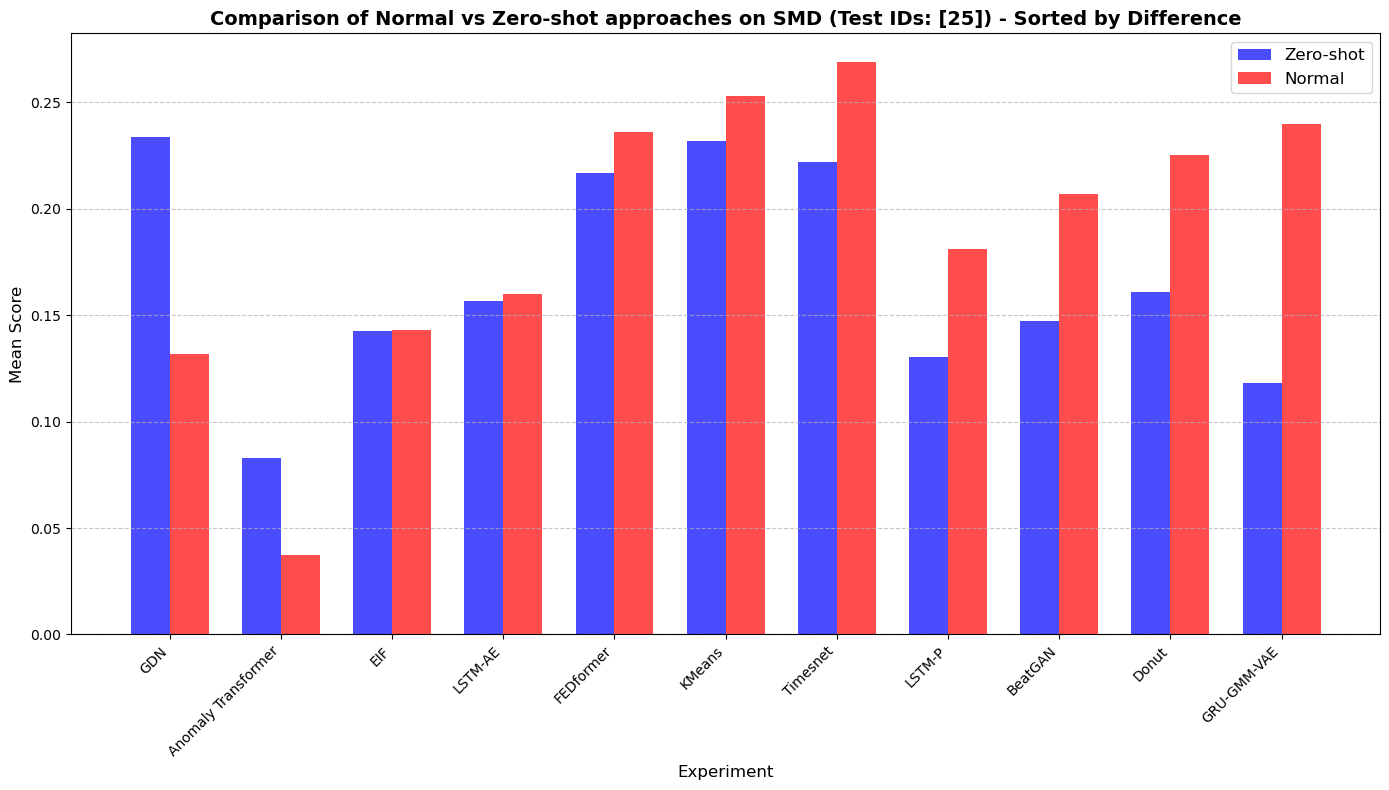

,readable_name,normal_mean,zero_mean,diff
5,GDN,0.1317,0.2336,0.1019
0,Anomaly Transformer,0.0373,0.0827,0.0454
3,EIF,0.1429,0.1425,-0.0004
8,LSTM-AE,0.1601,0.1565,-0.0036
4,FEDformer,0.2361,0.2168,-0.0193
7,KMeans,0.2528,0.2318,-0.0209
10,Timesnet,0.2689,0.2220,-0.0470
9,LSTM-P,0.1812,0.1305,-0.0507
1,BeatGAN,0.2068,0.1474,-0.0594
2,Donut,0.2254,0.1608,-0.0647


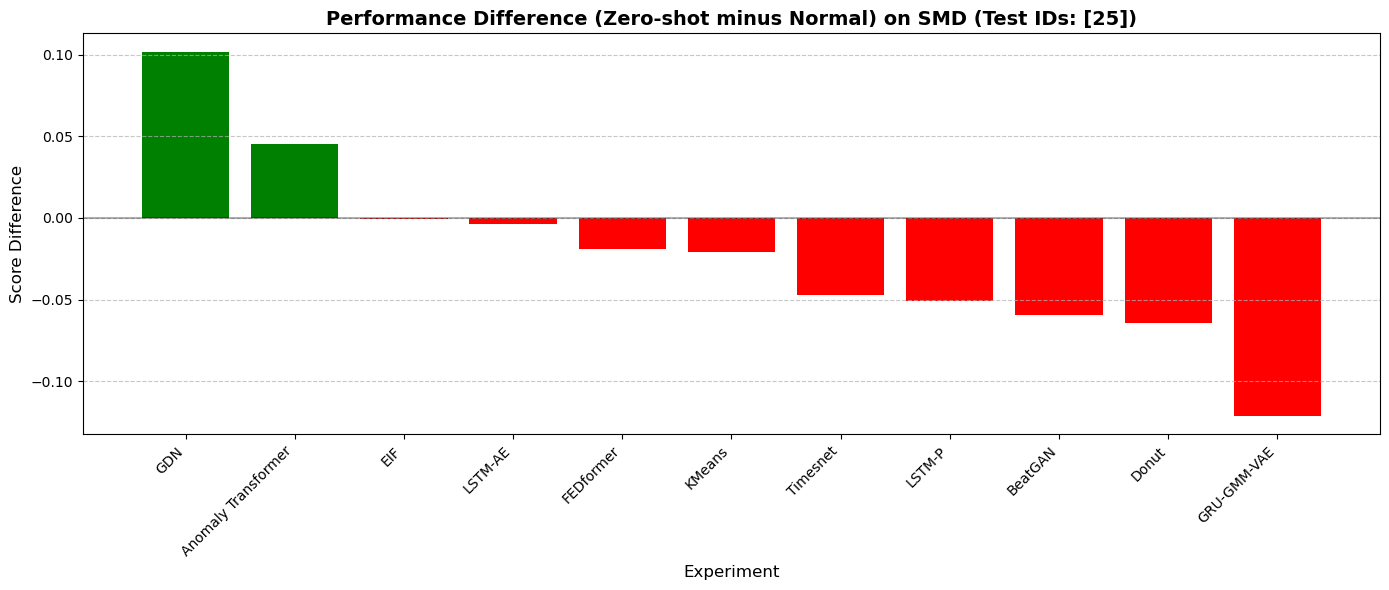

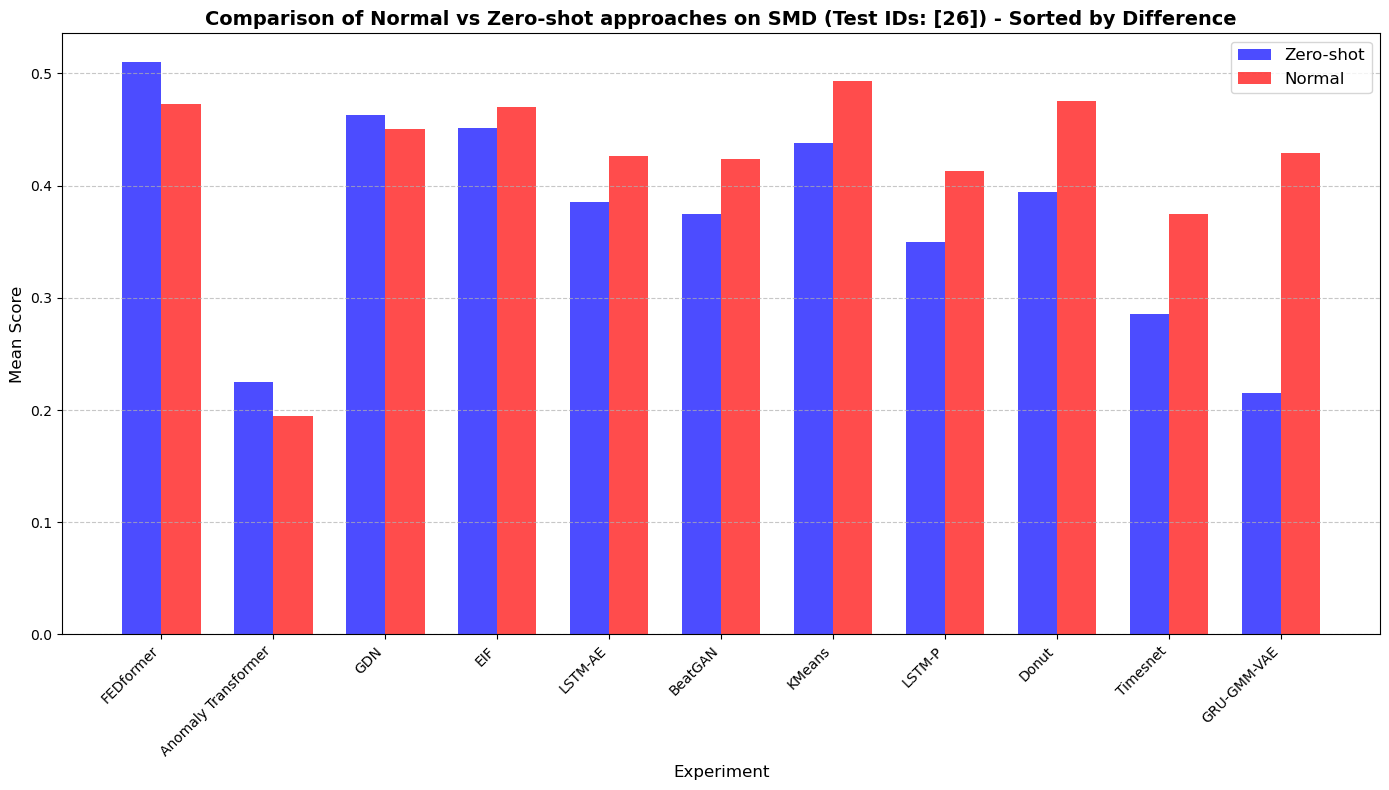

,readable_name,normal_mean,zero_mean,diff
4,FEDformer,0.4725,0.5103,0.0377
0,Anomaly Transformer,0.1949,0.2254,0.0305
5,GDN,0.4505,0.4632,0.0128
3,EIF,0.4700,0.4518,-0.0182
8,LSTM-AE,0.4268,0.3853,-0.0414
1,BeatGAN,0.4233,0.3746,-0.0488
7,KMeans,0.4936,0.4378,-0.0558
9,LSTM-P,0.4127,0.3499,-0.0628
2,Donut,0.4754,0.3942,-0.0812
10,Timesnet,0.3744,0.2856,-0.0888


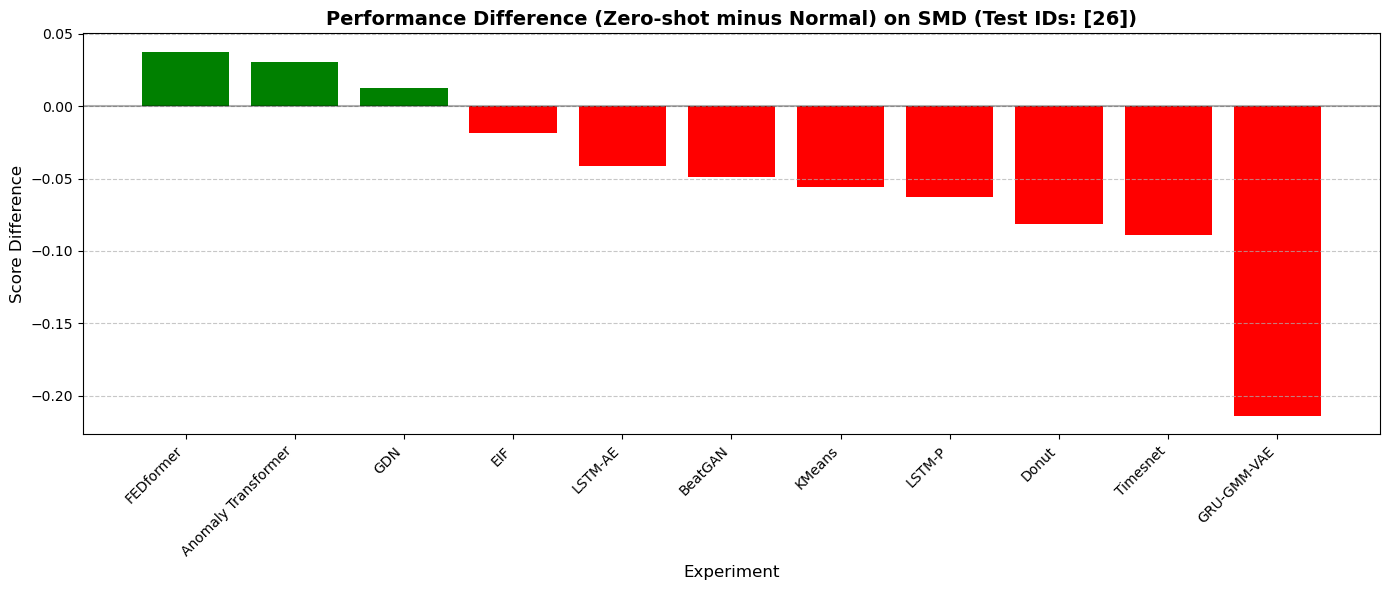

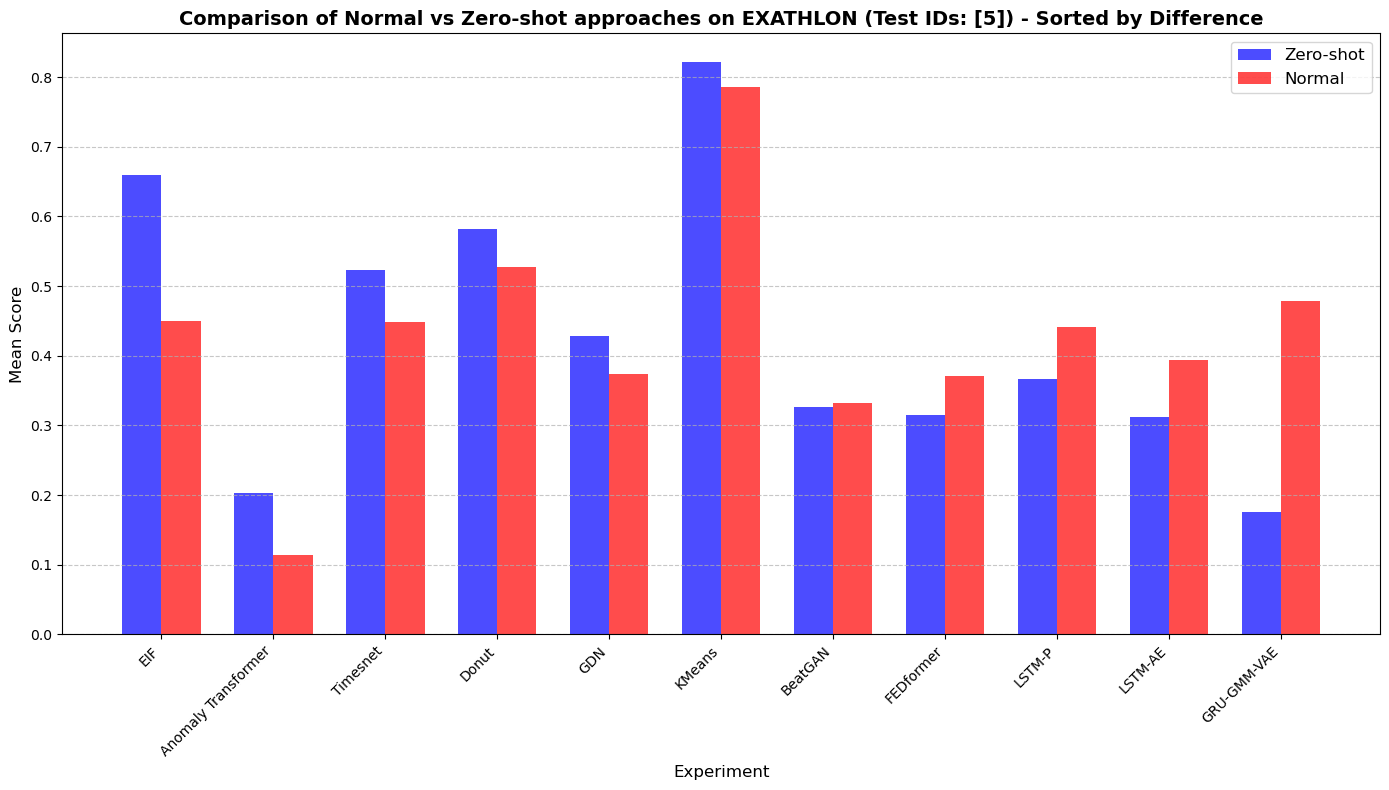

,readable_name,normal_mean,zero_mean,diff
3,EIF,0.4502,0.6597,0.2095
0,Anomaly Transformer,0.1144,0.2027,0.0883
10,Timesnet,0.4481,0.5227,0.0746
2,Donut,0.5276,0.5821,0.0546
5,GDN,0.3737,0.4277,0.0540
7,KMeans,0.7852,0.8216,0.0364
1,BeatGAN,0.3319,0.3266,-0.0053
4,FEDformer,0.3707,0.3146,-0.0561
9,LSTM-P,0.4409,0.3663,-0.0746
8,LSTM-AE,0.3935,0.3122,-0.0813


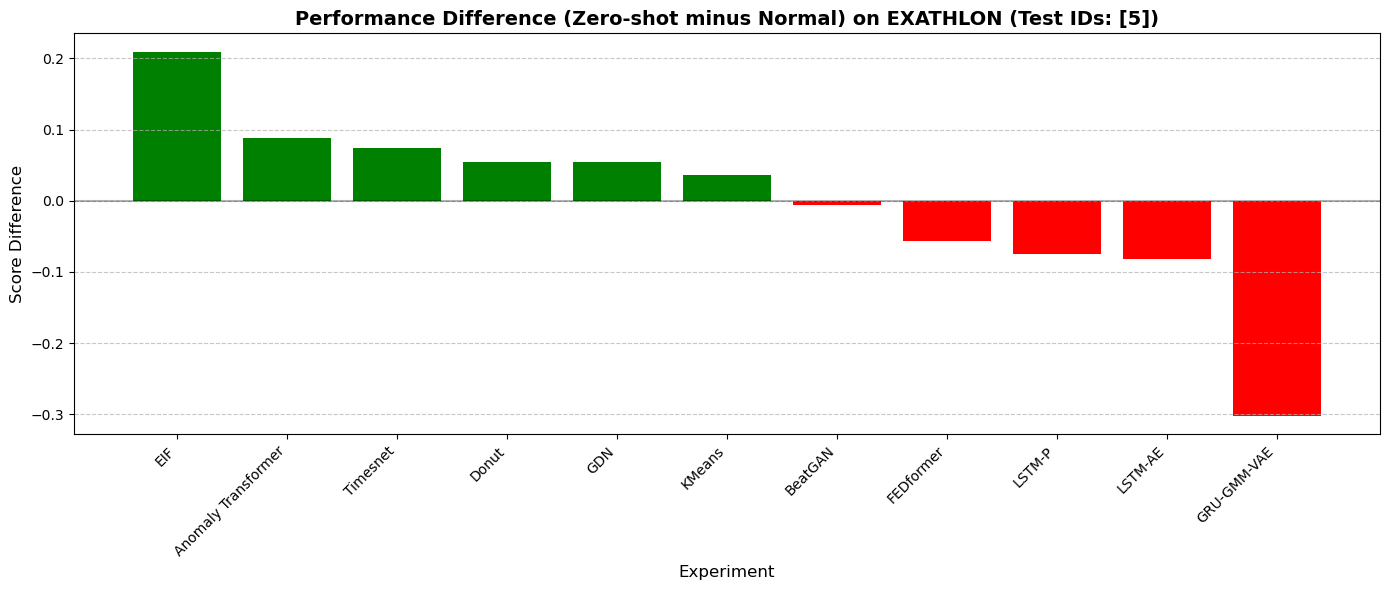

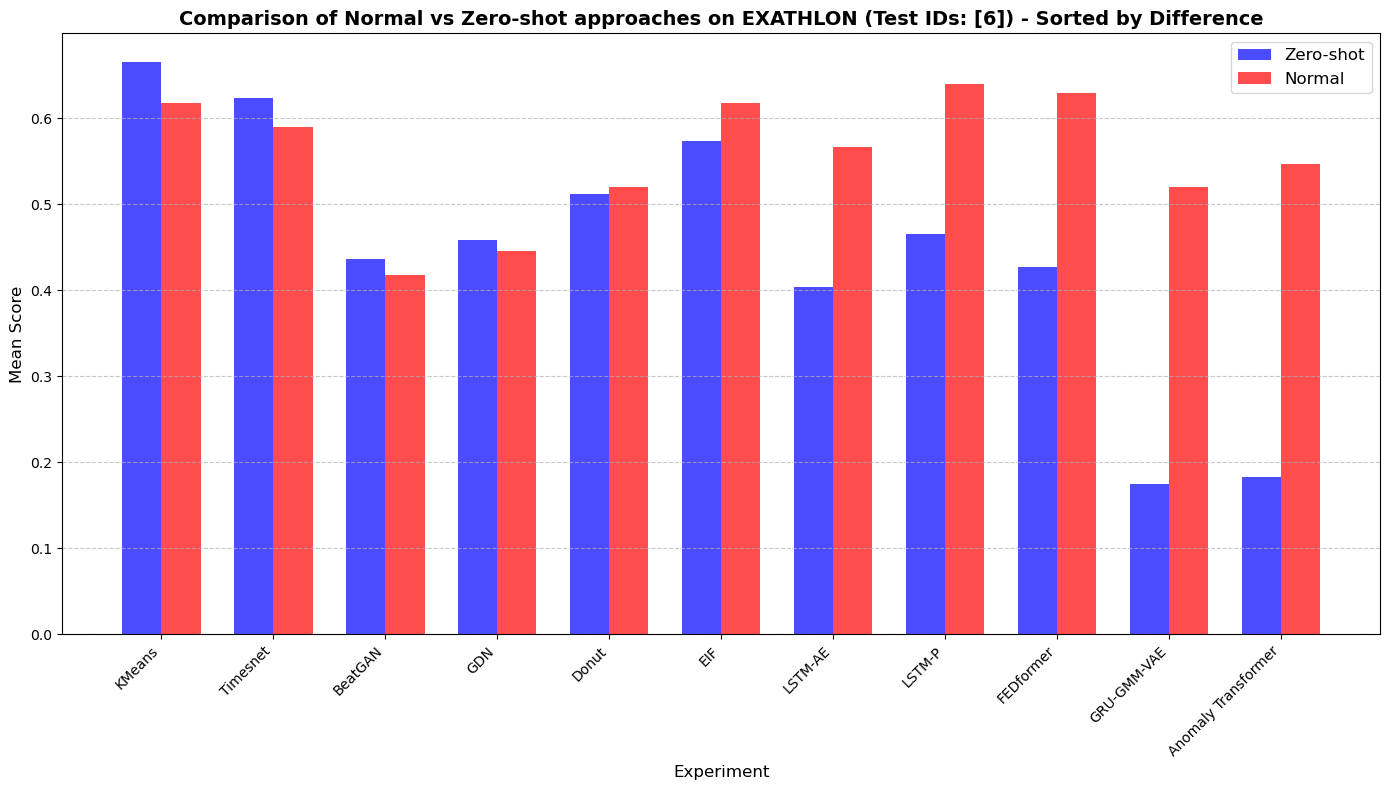

,readable_name,normal_mean,zero_mean,diff
7,KMeans,0.6174,0.6656,0.0482
10,Timesnet,0.5897,0.6239,0.0342
1,BeatGAN,0.4181,0.4361,0.0180
5,GDN,0.4462,0.4587,0.0125
2,Donut,0.5207,0.5122,-0.0084
3,EIF,0.6179,0.5732,-0.0446
8,LSTM-AE,0.5671,0.4040,-0.1631
9,LSTM-P,0.6401,0.4660,-0.1741
4,FEDformer,0.6295,0.4267,-0.2028
6,GRU-GMM-VAE,0.5205,0.1753,-0.3452


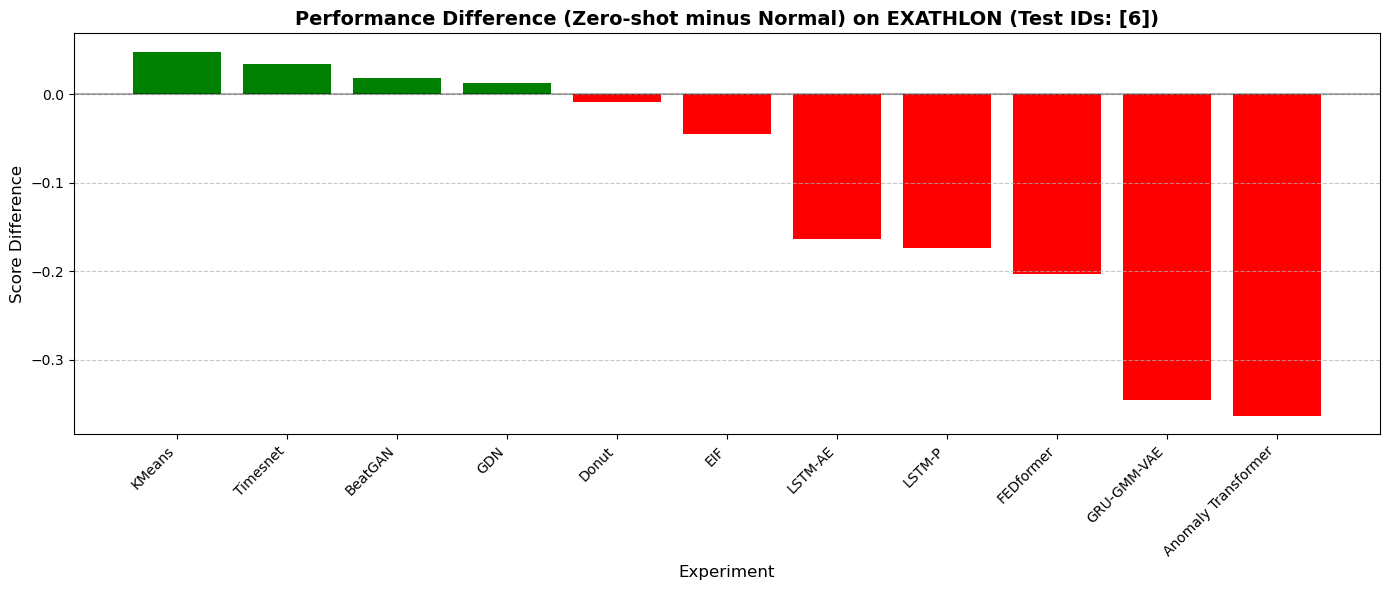

In [17]:
# Plot grouped bar chart for SMD dataset, sorted by differences
plot_experiment_comparison(df, 'smd', [25], sort_by='diff')
plot_experiment_comparison(df, 'smd', [26], sort_by='diff')
plot_experiment_comparison(df, 'exathlon', [5], sort_by='diff')
plot_experiment_comparison(df, 'exathlon', [6], sort_by='diff')

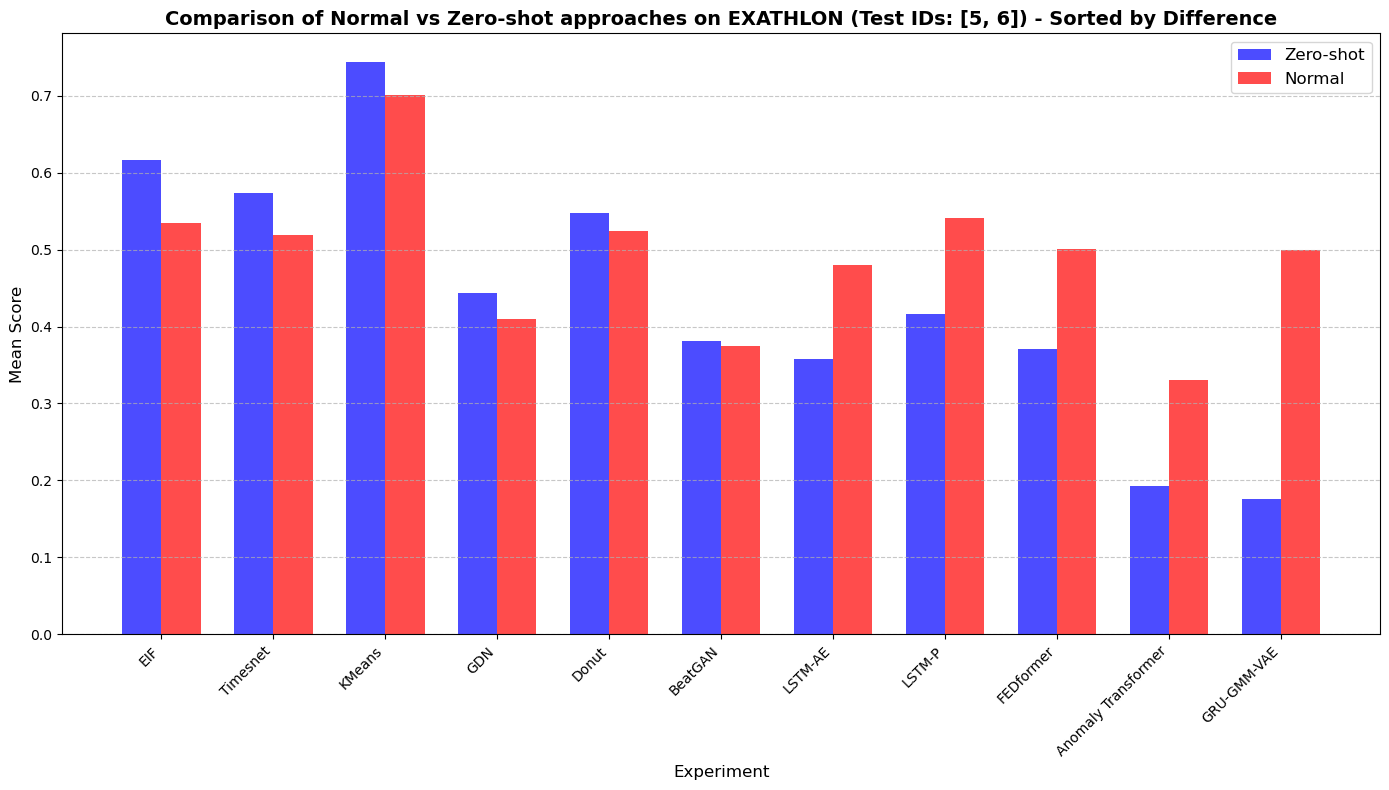

,readable_name,normal_mean,zero_mean,diff
3,EIF,0.5340,0.6165,0.0825
10,Timesnet,0.5189,0.5733,0.0544
7,KMeans,0.7013,0.7436,0.0423
5,GDN,0.4099,0.4432,0.0333
2,Donut,0.5241,0.5472,0.0231
1,BeatGAN,0.3750,0.3814,0.0064
8,LSTM-AE,0.4803,0.3581,-0.1222
9,LSTM-P,0.5405,0.4161,-0.1243
4,FEDformer,0.5001,0.3706,-0.1294
0,Anomaly Transformer,0.3305,0.1927,-0.1377


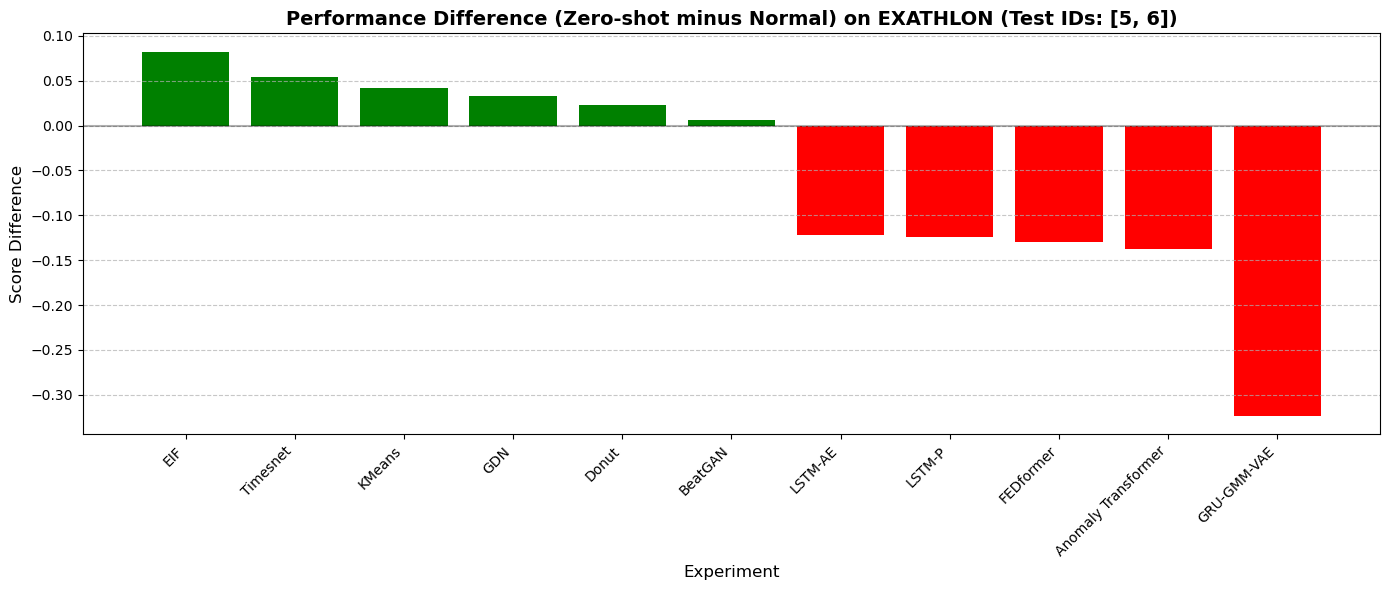

In [18]:
# Plot grouped bar chart for Exathlon dataset, sorted by differences
plot_experiment_comparison(df, 'exathlon', [5, 6], sort_by='diff')

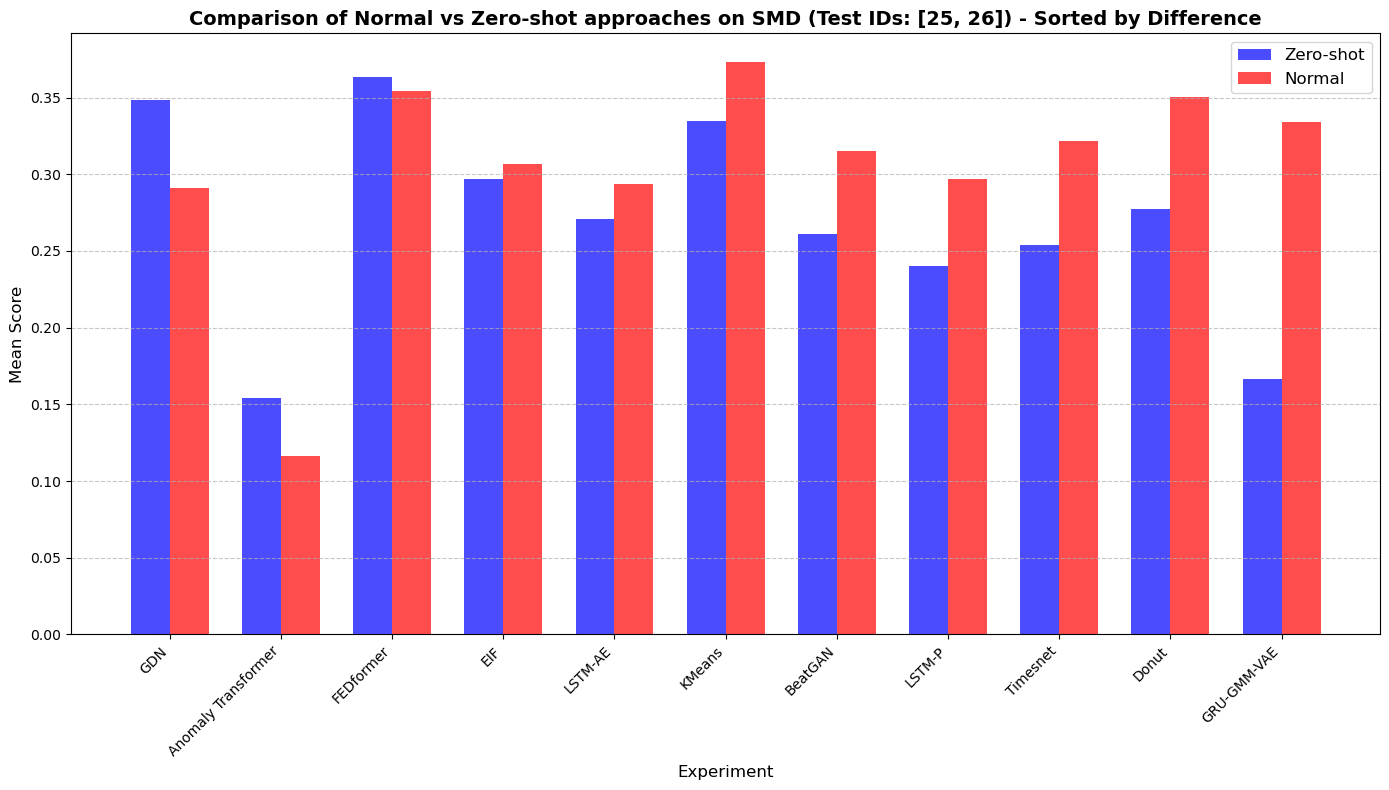

,readable_name,normal_mean,zero_mean,diff
5,GDN,0.2911,0.3484,0.0573
0,Anomaly Transformer,0.1161,0.1541,0.0380
4,FEDformer,0.3543,0.3635,0.0092
3,EIF,0.3065,0.2971,-0.0093
8,LSTM-AE,0.2935,0.2709,-0.0225
7,KMeans,0.3732,0.3348,-0.0384
1,BeatGAN,0.3151,0.2610,-0.0541
9,LSTM-P,0.2970,0.2402,-0.0568
10,Timesnet,0.3217,0.2538,-0.0679
2,Donut,0.3504,0.2775,-0.0729


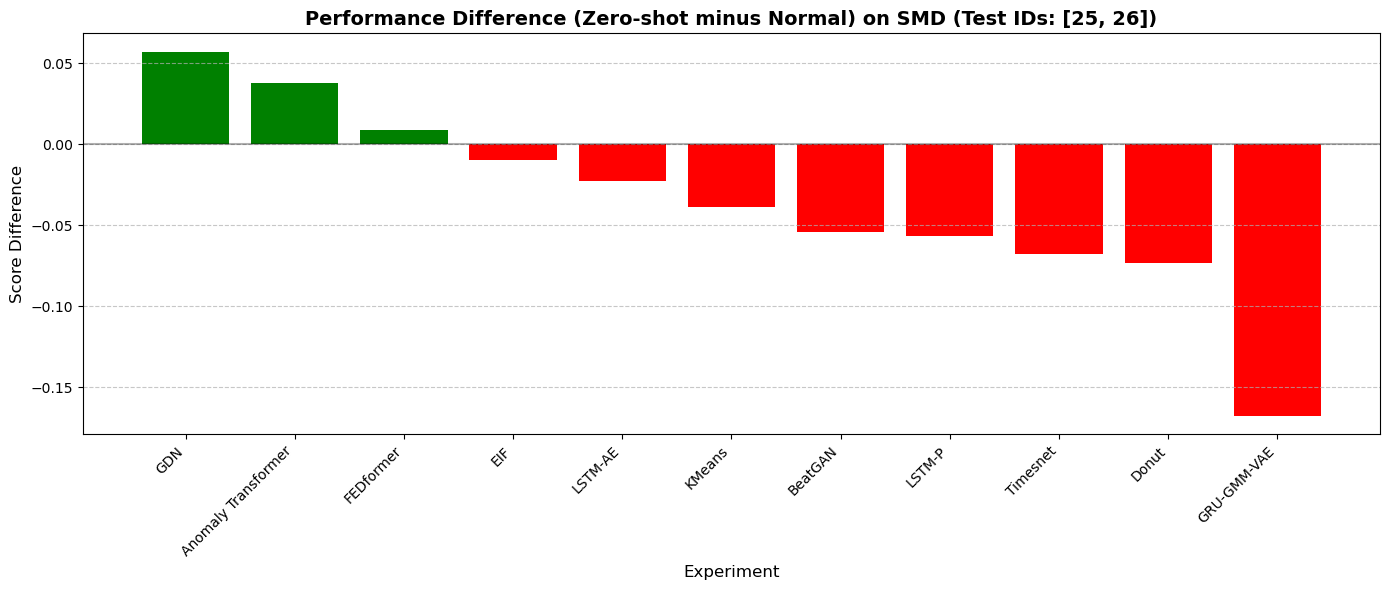

In [19]:
# Compare both SMD test datasets
plot_experiment_comparison(df, 'smd', [25, 26], sort_by='diff')

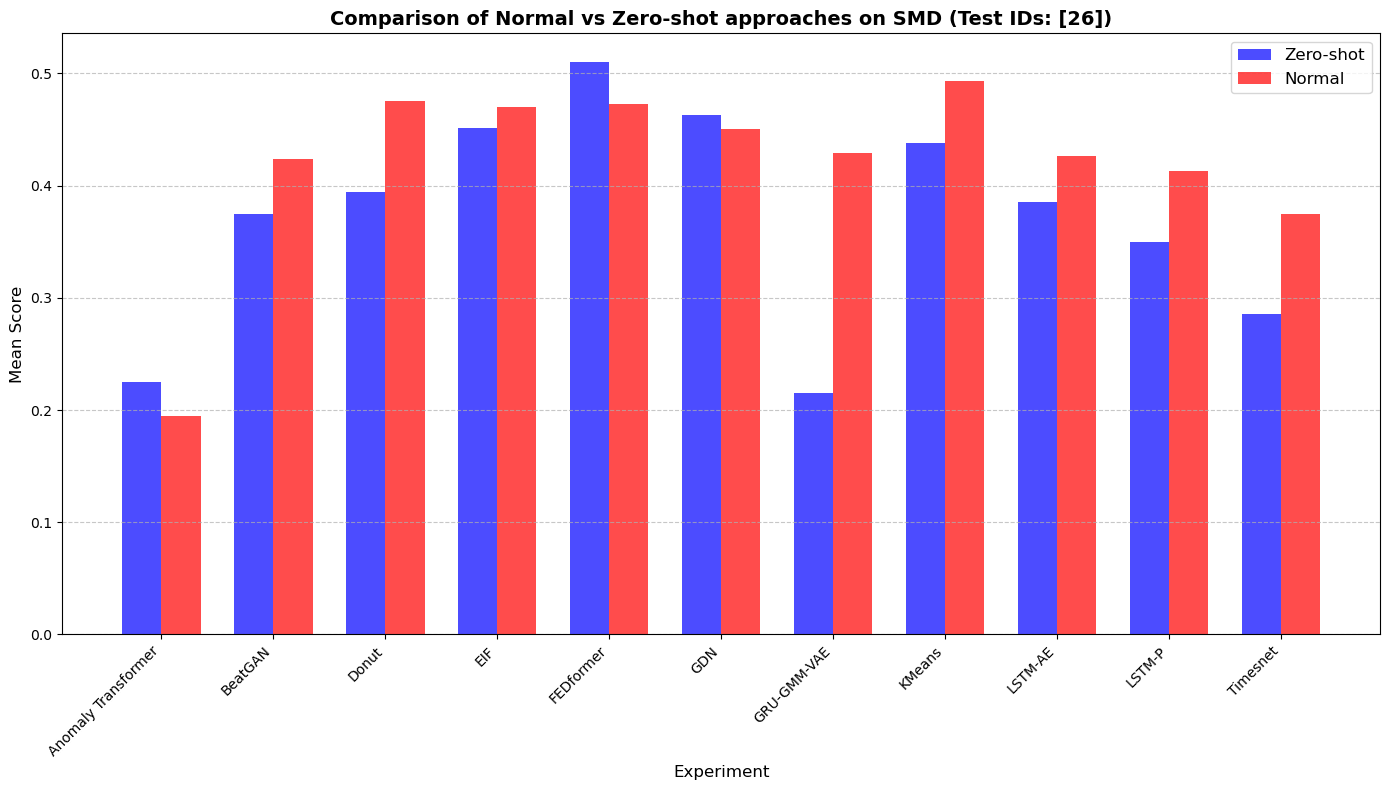

,readable_name,normal_mean,zero_mean,diff
0,Anomaly Transformer,0.1949,0.2254,0.0305
1,BeatGAN,0.4233,0.3746,-0.0488
2,Donut,0.4754,0.3942,-0.0812
3,EIF,0.4700,0.4518,-0.0182
4,FEDformer,0.4725,0.5103,0.0377
5,GDN,0.4505,0.4632,0.0128
6,GRU-GMM-VAE,0.4289,0.2148,-0.2141
7,KMeans,0.4936,0.4378,-0.0558
8,LSTM-AE,0.4268,0.3853,-0.0414
9,LSTM-P,0.4127,0.3499,-0.0628


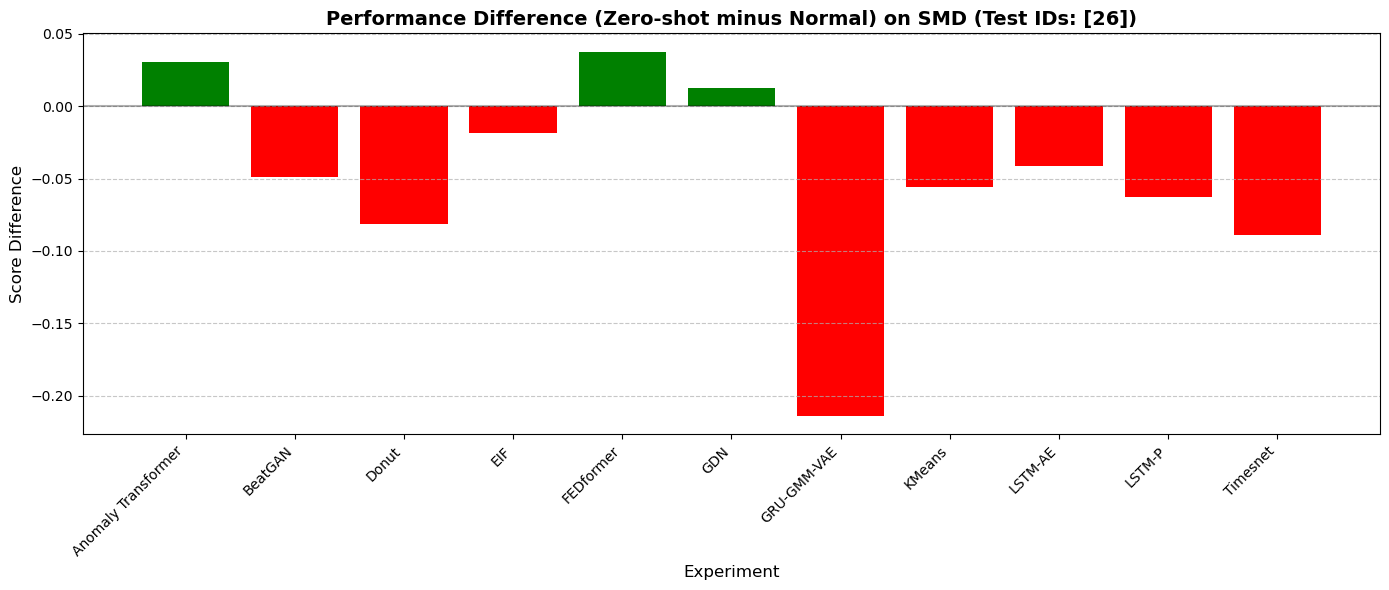

In [20]:
# Plot with alphabetical ordering for comparison
plot_experiment_comparison(df, 'smd', [26], sort_by='name')

# Additional Insights and Visualizations

This section explores additional insights from the data, including:
1. Correlation between zero-shot and normal performance
2. Performance consistency analysis
3. Model ranking comparison
4. Overall performance distribution comparison

In [21]:
def plot_correlation_analysis(df, dataset, test_ids):
    """Plot correlation between zero-shot and normal performance across models"""
    # Extract data for normal and zero-shot approaches
    normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
    zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)

    # Create experiment mapping with readable names
    exp_mapping = {exp: get_readable_name(exp) for exp in normal_data['experiment'].unique()}

    # Get mean scores per experiment for both approaches
    normal_means = normal_data.groupby('experiment').mean()['score']
    zero_means = zero_data.groupby('experiment').mean()['score']

    # Create a dataframe for comparison
    comparison_df = pd.DataFrame({
        'experiment': normal_means.index,
        'readable_name': [get_readable_name(exp) for exp in normal_means.index],
        'Normal': normal_means.values,
        'Zero-shot': zero_means.values,
        'Difference': zero_means.values - normal_means.values
    })

    # Calculate correlation
    correlation = normal_means.corr(zero_means)

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(comparison_df['Normal'], comparison_df['Zero-shot'], alpha=0.7, s=100)

    # Add identity line (y=x) for reference
    min_val = min(comparison_df['Normal'].min(), comparison_df['Zero-shot'].min()) - 0.05
    max_val = max(comparison_df['Normal'].max(), comparison_df['Zero-shot'].max()) + 0.05
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)

    # Add labels for each point using readable names
    for i, row in comparison_df.iterrows():
        plt.annotate(row['readable_name'],
                     (row['Normal'], row['Zero-shot']),
                     textcoords='offset points',
                     xytext=(5, 5),
                     fontsize=10)

    # Add title and labels
    plt.title(f'Zero-shot vs Normal Performance Correlation on {dataset.upper()} (r={correlation:.3f})',
              fontsize=14, fontweight='bold')
    plt.xlabel('Normal Performance', fontsize=12)
    plt.ylabel('Zero-shot Performance', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Add quadrant labels to interpret results
    median_normal = comparison_df['Normal'].median()
    median_zero = comparison_df['Zero-shot'].median()
    plt.axhline(y=median_zero, color='gray', linestyle=':', alpha=0.7)
    plt.axvline(x=median_normal, color='gray', linestyle=':', alpha=0.7)

    # Add text explanations for each quadrant
    plt.text(min_val+0.01, max_val-0.01, "Good zero-shot\nPoor normal", fontsize=9, va='top')
    plt.text(max_val-0.01, max_val-0.01, "Good in both\napproaches", fontsize=9, va='top', ha='right')
    plt.text(min_val+0.01, min_val+0.01, "Poor in both\napproaches", fontsize=9, va='bottom')
    plt.text(max_val-0.01, min_val+0.01, "Good normal\nPoor zero-shot", fontsize=9, va='bottom', ha='right')

    plt.tight_layout()
    plt.show()

    # Display the comparison dataframe
    comparison_df = comparison_df.sort_values('Difference', ascending=False)
    display_df = comparison_df[['readable_name', 'Normal', 'Zero-shot', 'Difference']].round(4)
    display(display_df)

    return correlation

SMD Dataset Correlation Analysis:


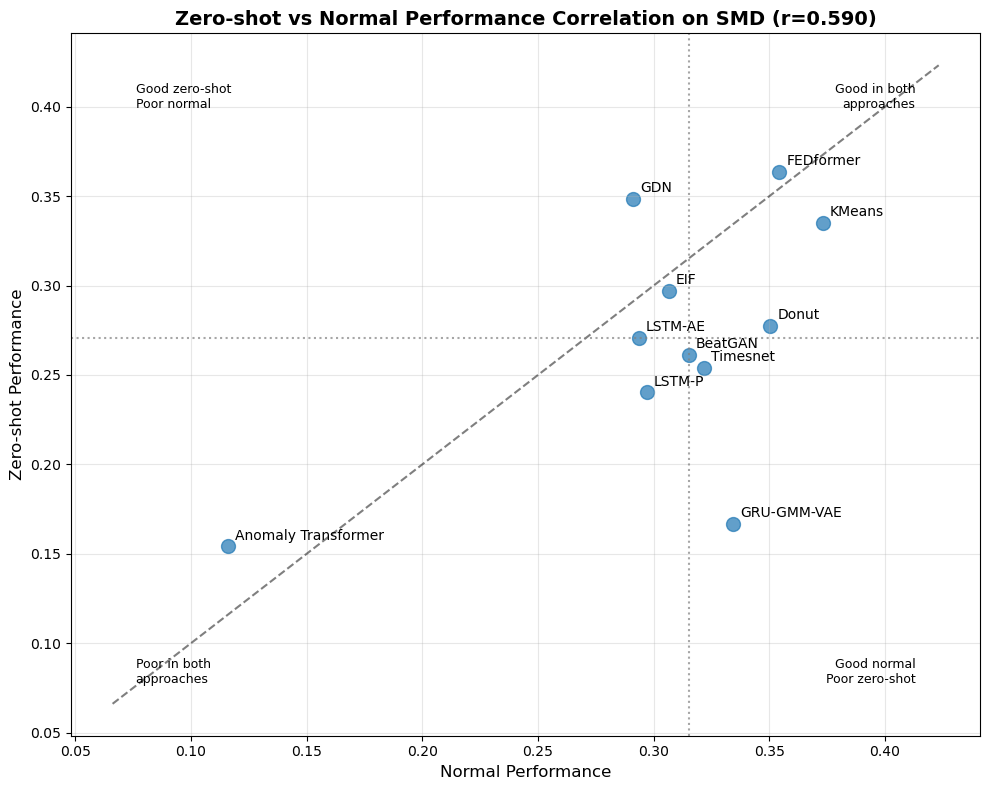

,readable_name,Normal,Zero-shot,Difference
5,GDN,0.2911,0.3484,0.0573
0,Anomaly Transformer,0.1161,0.1541,0.0380
4,FEDformer,0.3543,0.3635,0.0092
3,EIF,0.3065,0.2971,-0.0093
8,LSTM-AE,0.2935,0.2709,-0.0225
7,KMeans,0.3732,0.3348,-0.0384
1,BeatGAN,0.3151,0.2610,-0.0541
9,LSTM-P,0.2970,0.2402,-0.0568
10,Timesnet,0.3217,0.2538,-0.0679
2,Donut,0.3504,0.2775,-0.0729



Exathlon Dataset Correlation Analysis:


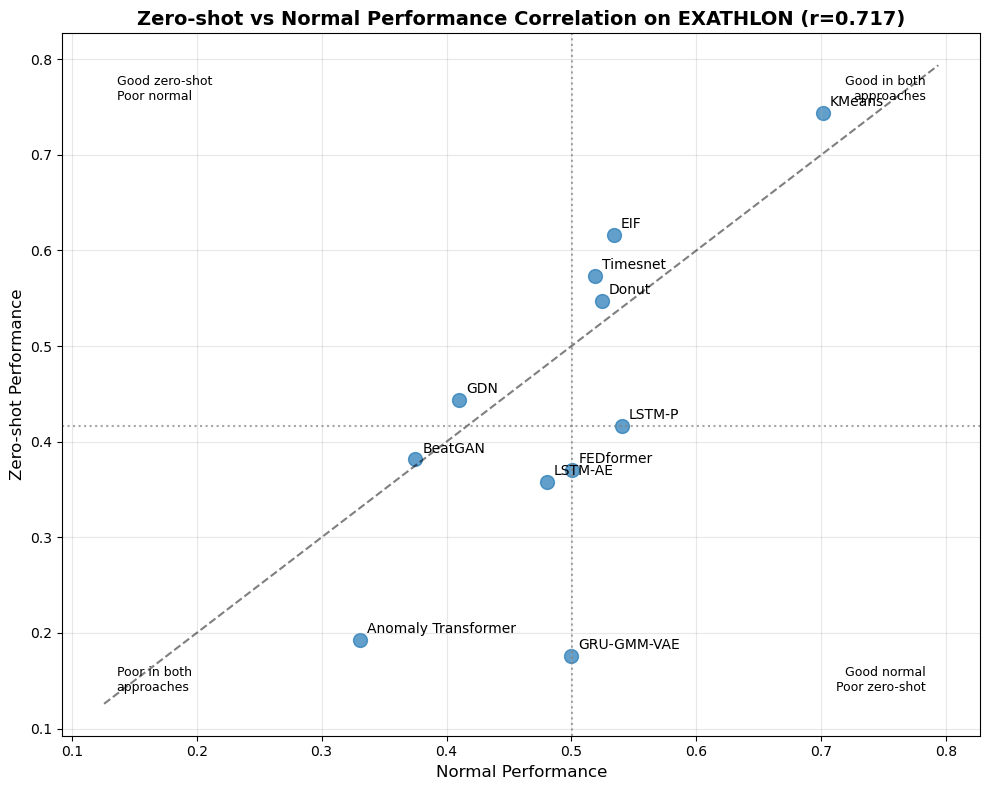

,readable_name,Normal,Zero-shot,Difference
3,EIF,0.5340,0.6165,0.0825
10,Timesnet,0.5189,0.5733,0.0544
7,KMeans,0.7013,0.7436,0.0423
5,GDN,0.4099,0.4432,0.0333
2,Donut,0.5241,0.5472,0.0231
1,BeatGAN,0.3750,0.3814,0.0064
8,LSTM-AE,0.4803,0.3581,-0.1222
9,LSTM-P,0.5405,0.4161,-0.1243
4,FEDformer,0.5001,0.3706,-0.1294
0,Anomaly Transformer,0.3305,0.1927,-0.1377


In [22]:
# Run correlation analysis for both datasets
print("SMD Dataset Correlation Analysis:")
smd_corr = plot_correlation_analysis(df, 'smd', [25, 26])

print("\nExathlon Dataset Correlation Analysis:")
exathlon_corr = plot_correlation_analysis(df, 'exathlon', [5, 6])

In [23]:
def plot_model_ranking_comparison(df, dataset, test_ids):
    """Compare model rankings between zero-shot and normal approaches"""
    # Extract data
    normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
    zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)

    # Calculate mean scores per experiment
    normal_means = normal_data.groupby('experiment').mean()['score'].reset_index()
    zero_means = zero_data.groupby('experiment').mean()['score'].reset_index()

    # Add readable names
    normal_means['readable_name'] = normal_means['experiment'].apply(get_readable_name)
    zero_means['readable_name'] = zero_means['experiment'].apply(get_readable_name)

    # Create rankings
    normal_means['normal_rank'] = normal_means['score'].rank(ascending=False)
    zero_means['zero_rank'] = zero_means['score'].rank(ascending=False)

    # Merge dataframes
    ranking_df = pd.merge(normal_means, zero_means, on=['experiment', 'readable_name'], suffixes=('_normal', '_zero'))
    ranking_df['rank_difference'] = ranking_df['normal_rank'] - ranking_df['zero_rank']
    ranking_df['absolute_rank_difference'] = abs(ranking_df['rank_difference'])

    # Sort by rank difference
    ranking_df = ranking_df.sort_values('rank_difference')

    # Find the longest model name to adjust figure width accordingly
    max_name_length = max(len(name) for name in ranking_df['readable_name'])
    n_models = len(ranking_df)

    # Calculate appropriate figure size based on number of models and longest name
    fig_width = 8  # Fixed width since we'll place labels outside
    fig_height = max(6, n_models * 0.4)  # Adjust height based on number of models

    # Create figure with calculated dimensions
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Define colors based on rank improvement or deterioration
    colors = ['green' if diff > 0 else 'red' if diff < 0 else 'gray' for diff in ranking_df['rank_difference']]

    # Plot connecting lines
    for i, (_, row) in enumerate(ranking_df.iterrows()):
        ax.plot([1, 2], [row['normal_rank'], row['zero_rank']],
                 color=colors[i], alpha=0.7, linewidth=1.5)

    # Add data points
    ax.scatter([1] * len(ranking_df), ranking_df['normal_rank'], color='red', s=80, alpha=0.7, label='Normal')
    ax.scatter([2] * len(ranking_df), ranking_df['zero_rank'], color='blue', s=80, alpha=0.7, label='Zero-shot')

    # Set y-axis in reverse (rank 1 at top)
    ax.invert_yaxis()

    # Set x-axis labels
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Normal', 'Zero-shot'], fontsize=12)
    ax.set_yticks([i for i in range(1, len(ranking_df) + 1)])
    ax.grid(axis='y', linestyle='--', alpha=0.3)

    # Set axis limits to provide just enough space for data
    ax.set_xlim(0.5, 2.5)

    # Remove the default right spine
    ax.spines['right'].set_visible(False)

    # Add model names as y-tick labels on the right side of the plot
    # First, create a twin axis that shares the y-axis
    ax2 = ax.twinx()

    # Set the same y limits and invert the y-axis for the twin
    ax2.set_ylim(ax.get_ylim())
    ax2.invert_yaxis()

    # Create a dataframe sorted by zero-shot rank for the labels
    # Sort in reverse to match the ranking order (rank 1 at top)
    label_df = ranking_df.sort_values('zero_rank', ascending=True)

    # Set tick positions at the rank positions of the zero-shot models (in order of ranks)
    ax2.set_yticks(len(label_df) - label_df['zero_rank'] + 1)

    # Set the labels to be the model names (matching the zero-shot ranks)
    ax2.set_yticklabels(label_df['readable_name'])#, fontsize=10)

    # Remove tick marks but keep the labels
    ax2.tick_params(axis='y', which='both', length=0)

    # Add a legend explaining the colors
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='green', lw=2),
                   Line2D([0], [0], color='red', lw=2),
                   Line2D([0], [0], color='gray', lw=2)]

    # Move the legend to bottom to save space at the top
    ax.legend(custom_lines, ['Rank improved in zero-shot', 'Rank declined in zero-shot',
                         'No change'], loc='upper center', bbox_to_anchor=(0.5, -0.05),
                         ncol=3, frameon=False)

    plt.title(f'Model Ranking Shifts: Normal vs. Zero-shot on {dataset.upper()}',
    )#fontsize=14, fontweight='bold')
    ax.set_ylabel('Rank (lower is better)')#, fontsize=12)

    # Use tight layout to properly fit everything
    plt.tight_layout()

    # Display the figure
    plt.show()

    # Display ranking table with readable names
    display_df = ranking_df[['readable_name', 'score_normal', 'normal_rank', 'score_zero', 'zero_rank', 'rank_difference']]
    display_df = display_df.sort_values('normal_rank')
    display(display_df.round(4))

    # Calculate Spearman rank correlation
    spearman_corr = ranking_df['normal_rank'].corr(ranking_df['zero_rank'], method='spearman')
    print(f"Spearman rank correlation: {spearman_corr:.4f}")

    # Identify models with most significant rank changes
    print("\nModels with most significant rank changes:")
    significant_changes = ranking_df.sort_values('absolute_rank_difference', ascending=False).head(3)
    for i, row in significant_changes.iterrows():
        direction = "improved" if row['rank_difference'] > 0 else "declined"
        print(f"  - {row['readable_name']} {direction} by {abs(row['rank_difference']):.0f} ranks in zero-shot")

SMD Dataset Model Ranking Analysis:


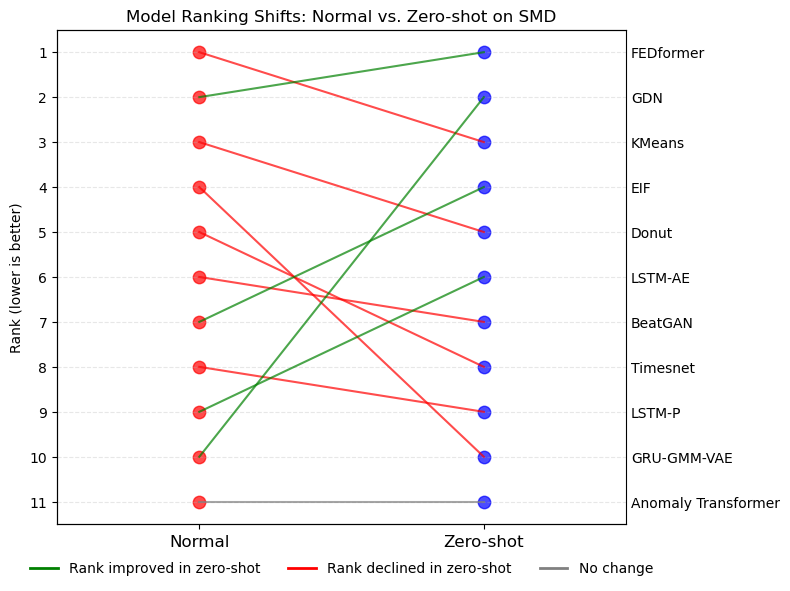

,readable_name,score_normal,normal_rank,score_zero,zero_rank,rank_difference
7,KMeans,0.3732,1.0,0.3348,3.0,-2.0
4,FEDformer,0.3543,2.0,0.3635,1.0,1.0
2,Donut,0.3504,3.0,0.2775,5.0,-2.0
6,GRU-GMM-VAE,0.3343,4.0,0.1665,10.0,-6.0
10,Timesnet,0.3217,5.0,0.2538,8.0,-3.0
1,BeatGAN,0.3151,6.0,0.2610,7.0,-1.0
3,EIF,0.3065,7.0,0.2971,4.0,3.0
9,LSTM-P,0.2970,8.0,0.2402,9.0,-1.0
8,LSTM-AE,0.2935,9.0,0.2709,6.0,3.0
5,GDN,0.2911,10.0,0.3484,2.0,8.0


Spearman rank correlation: 0.3727

Models with most significant rank changes:
  - GDN improved by 8 ranks in zero-shot
  - GRU-GMM-VAE declined by 6 ranks in zero-shot
  - Timesnet declined by 3 ranks in zero-shot

Exathlon Dataset Model Ranking Analysis:


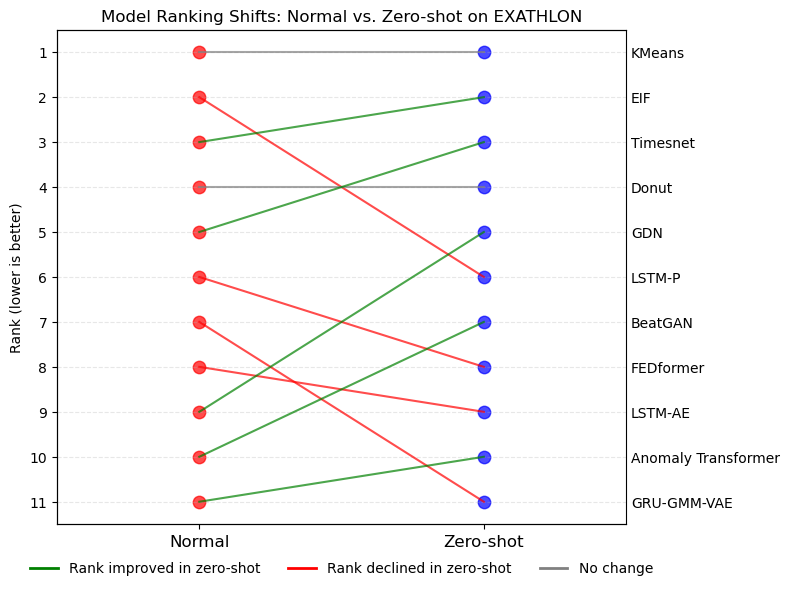

,readable_name,score_normal,normal_rank,score_zero,zero_rank,rank_difference
7,KMeans,0.7013,1.0,0.7436,1.0,0.0
9,LSTM-P,0.5405,2.0,0.4161,6.0,-4.0
3,EIF,0.5340,3.0,0.6165,2.0,1.0
2,Donut,0.5241,4.0,0.5472,4.0,0.0
10,Timesnet,0.5189,5.0,0.5733,3.0,2.0
4,FEDformer,0.5001,6.0,0.3706,8.0,-2.0
6,GRU-GMM-VAE,0.4998,7.0,0.1759,11.0,-4.0
8,LSTM-AE,0.4803,8.0,0.3581,9.0,-1.0
5,GDN,0.4099,9.0,0.4432,5.0,4.0
1,BeatGAN,0.3750,10.0,0.3814,7.0,3.0


Spearman rank correlation: 0.6909

Models with most significant rank changes:
  - GRU-GMM-VAE declined by 4 ranks in zero-shot
  - LSTM-P declined by 4 ranks in zero-shot
  - GDN improved by 4 ranks in zero-shot


In [24]:
# Analyze model ranking shifts
print("SMD Dataset Model Ranking Analysis:")
plot_model_ranking_comparison(df, 'smd', [25, 26])

print("\nExathlon Dataset Model Ranking Analysis:")
plot_model_ranking_comparison(df, 'exathlon', [5, 6])

In [25]:
def plot_overall_performance_distribution(df):
    """Compare overall performance distribution between zero-shot and normal across datasets"""
    # Get unique datasets and test IDs in the dataframe
    dataset_test_ids = {}
    for experiment in df['experiment'].unique():
        if '_smd_' in experiment:
            if 'smd' not in dataset_test_ids:
                dataset_test_ids['smd'] = []
            test_id = int(experiment.split('_')[-2]) if '_normal' in experiment else int(experiment.split('_')[-1])
            if test_id not in dataset_test_ids['smd']:
                dataset_test_ids['smd'].append(test_id)
        elif '_exathlon_' in experiment:
            if 'exathlon' not in dataset_test_ids:
                dataset_test_ids['exathlon'] = []
            test_id = int(experiment.split('_')[-2]) if '_normal' in experiment else int(experiment.split('_')[-1])
            if test_id not in dataset_test_ids['exathlon']:
                dataset_test_ids['exathlon'].append(test_id)

    datasets = list(dataset_test_ids.keys())

    # Create a figure with subplots for each dataset
    fig, axes = plt.subplots(1, len(datasets), figsize=(14, 6), sharey=True)
    if len(datasets) == 1:
        axes = [axes]

    # Process each dataset
    for i, dataset in enumerate(datasets):
        test_ids = dataset_test_ids[dataset]

        # Extract all normal and zero-shot results for this dataset with appropriate test_ids
        normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
        zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)

        # Create data for boxplot
        data = [normal_data['score'], zero_data['score']]

        # Create boxplot
        box = axes[i].boxplot(data, labels=['Normal', 'Zero-shot'], patch_artist=True)

        # Set colors
        box['boxes'][0].set(facecolor='red', alpha=0.6)
        box['boxes'][1].set(facecolor='blue', alpha=0.6)

        # Add dataset title
        title = f"{dataset.upper()} Datasets"
        axes[i].set_title(title, fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.3)

    # Add overall title and y-label
    fig.suptitle('Overall Performance Distribution: Normal vs. Zero-shot', fontsize=14, fontweight='bold')
    fig.text(0.04, 0.5, 'Performance Score', va='center', rotation='vertical', fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

    # Statistical analysis - calculate p-values for difference in means
    from scipy import stats

    print("Statistical Analysis of Performance Differences:")
    for dataset in datasets:
        test_ids = dataset_test_ids[dataset]
        normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
        zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)

        t_stat, p_val = stats.ttest_ind(normal_data['score'], zero_data['score'], equal_var=False)

        print(f"\n{dataset.upper()} Dataset (Test IDs: {test_ids}):")
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_val:.4f}")

        if p_val < 0.05:
            print(f"  Result: Significant difference between normal and zero-shot performance (p < 0.05)")
            better = "Normal" if normal_data['score'].mean() > zero_data['score'].mean() else "Zero-shot"
            print(f"  {better} performs significantly better.")
        else:
            print(f"  Result: No significant difference between normal and zero-shot performance (p >= 0.05)")

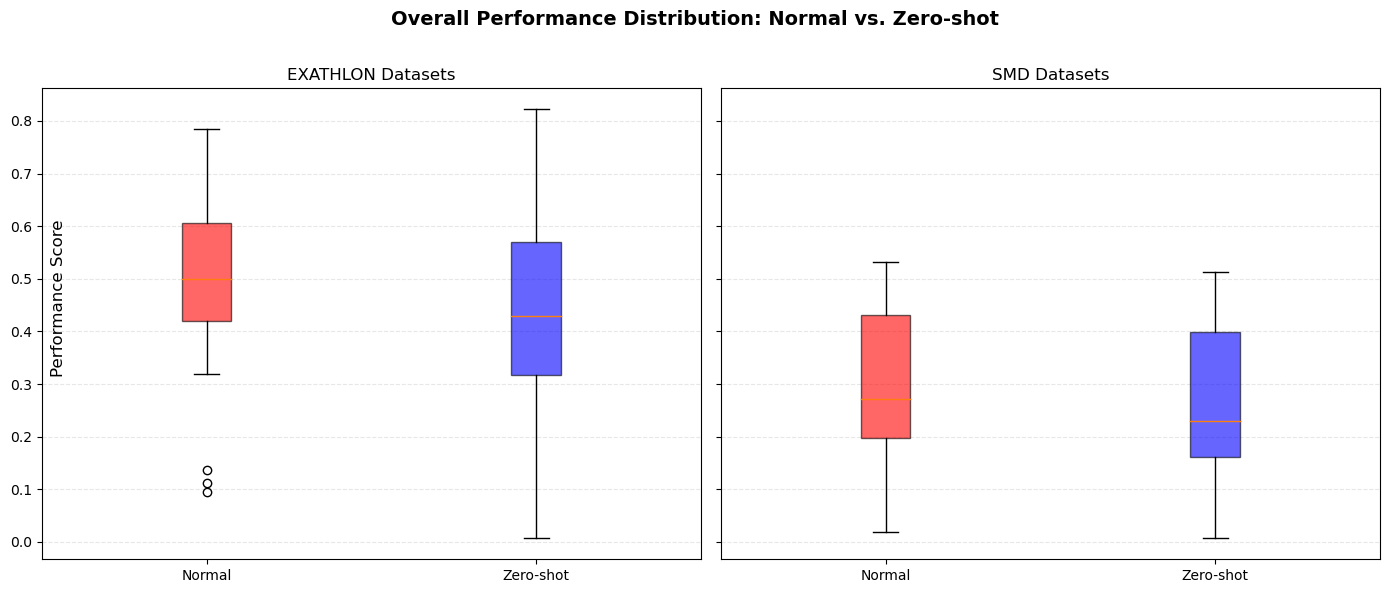

Statistical Analysis of Performance Differences:

EXATHLON Dataset (Test IDs: [5, 6]):
  t-statistic: 1.9469
  p-value: 0.0538
  Result: No significant difference between normal and zero-shot performance (p >= 0.05)

SMD Dataset (Test IDs: [25, 26]):
  t-statistic: 1.4457
  p-value: 0.1507
  Result: No significant difference between normal and zero-shot performance (p >= 0.05)


In [26]:
# Analyze overall performance distributions
plot_overall_performance_distribution(df)

In [27]:
def generate_summary_insights(df):
    """Generate a summary of key insights from the data"""
    # Get unique datasets and test IDs in the dataframe
    dataset_test_ids = {}
    for experiment in df['experiment'].unique():
        if '_smd_' in experiment:
            if 'smd' not in dataset_test_ids:
                dataset_test_ids['smd'] = []
            test_id = int(experiment.split('_')[-2]) if '_normal' in experiment else int(experiment.split('_')[-1])
            if test_id not in dataset_test_ids['smd']:
                dataset_test_ids['smd'].append(test_id)
        elif '_exathlon_' in experiment:
            if 'exathlon' not in dataset_test_ids:
                dataset_test_ids['exathlon'] = []
            test_id = int(experiment.split('_')[-2]) if '_normal' in experiment else int(experiment.split('_')[-1])
            if test_id not in dataset_test_ids['exathlon']:
                dataset_test_ids['exathlon'].append(test_id)

    datasets = list(dataset_test_ids.keys())

    print("SUMMARY OF KEY INSIGHTS FROM ANALYSIS")
    print("======================================\n")

    for dataset in datasets:
        test_ids = dataset_test_ids[dataset]
        print(f"Dataset: {dataset.upper()} (Test IDs: {test_ids})")
        print("------------------")

        normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
        zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)

        # Get top models
        normal_top = normal_data.groupby('experiment').mean().sort_values('score', ascending=False).head(3)
        zero_top = zero_data.groupby('experiment').mean().sort_values('score', ascending=False).head(3)

        # Get means
        normal_mean = normal_data['score'].mean()
        zero_mean = zero_data['score'].mean()
        diff = zero_mean - normal_mean
        diff_percent = (diff / normal_mean) * 100

        # Print insights
        print(f"1. Overall Performance:")
        print(f"   - Normal approach average: {normal_mean:.4f}")
        print(f"   - Zero-shot approach average: {zero_mean:.4f}")
        print(f"   - Difference: {diff:.4f} ({diff_percent:.1f}%)")
        winner = "Zero-shot" if diff > 0 else "Normal"
        print(f"   - {winner} performs better on average")

        print(f"\n2. Top performing models (Normal):")
        for i, (exp, row) in enumerate(normal_top.iterrows(), 1):
            print(f"   {i}. {exp}: {row['score']:.4f}")

        print(f"\n3. Top performing models (Zero-shot):")
        for i, (exp, row) in enumerate(zero_top.iterrows(), 1):
            print(f"   {i}. {exp}: {row['score']:.4f}")

        # Check for models in both top lists
        common_models = set(normal_top.index).intersection(set(zero_top.index))
        print(f"\n4. Models performing well in both approaches: {', '.join(common_models) if common_models else 'None'}")

        # Calculate variance of performance
        normal_var = normal_data.groupby('experiment')['score'].mean().var()
        zero_var = zero_data.groupby('experiment')['score'].mean().var()
        print(f"\n5. Performance variance across models:")
        print(f"   - Normal approach: {normal_var:.6f}")
        print(f"   - Zero-shot approach: {zero_var:.6f}")

        # More variable approach
        more_variable = "Zero-shot" if zero_var > normal_var else "Normal"
        print(f"   - {more_variable} approach shows greater performance variation across models")
        print("\n")

In [28]:
# Generate summary insights
generate_summary_insights(df)

SUMMARY OF KEY INSIGHTS FROM ANALYSIS

Dataset: EXATHLON (Test IDs: [5, 6])
------------------
1. Overall Performance:
   - Normal approach average: 0.4922
   - Zero-shot approach average: 0.4381
   - Difference: -0.0542 (-11.0%)
   - Normal performs better on average

2. Top performing models (Normal):
   1. kmeans: 0.7013
   2. lstm_p: 0.5405
   3. eif: 0.5340

3. Top performing models (Zero-shot):
   1. kmeans: 0.7436
   2. eif: 0.6165
   3. timesnet: 0.5733

4. Models performing well in both approaches: eif, kmeans

5. Performance variance across models:
   - Normal approach: 0.009646
   - Zero-shot approach: 0.029897
   - Zero-shot approach shows greater performance variation across models


Dataset: SMD (Test IDs: [25, 26])
------------------
1. Overall Performance:
   - Normal approach average: 0.3048
   - Zero-shot approach average: 0.2698
   - Difference: -0.0350 (-11.5%)
   - Normal performs better on average

2. Top performing models (Normal):
   1. kmeans: 0.3732
   2. fedf

# Shallow vs Deep Learning Methods Analysis

This section compares the performance of shallow methods (k-means and eif) with deep learning approaches both in normal and zero-shot settings.

In [29]:
def classify_method_type(experiment):
    """Classify method as shallow or deep learning"""
    # Extract model name from experiment string and get readable name
    model_name = get_readable_name(experiment) if '_' in experiment else experiment

    # Define shallow methods using readable names
    shallow_methods = ['KMeans', 'EIF']

    return 'Shallow' if model_name in shallow_methods else 'Deep'

In [30]:
def create_experiment_test_id_table(df, dataset, test_ids, approach_type=None, sort_by='mean_score'):
    """Create a table showing scores for each experiment across test IDs for a dataset.

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing experiment results
    dataset : str
        Name of the dataset (e.g., 'smd', 'exathlon')
    test_ids : list
        List of test IDs to include in the table
    approach_type : str or None
        Type of approach ('normal', 'zero', or None for both)
    sort_by : str
        Column to sort by ('mean_score' or a specific test_id)

    Returns:
    --------
    pandas.DataFrame
        A styled dataframe showing the performance table
    """
    # Process each approach type (normal, zero-shot, or both)
    approach_types = ['normal', 'zero'] if approach_type is None else [approach_type]
    results_dfs = []

    for approach in approach_types:
        approach_results = []

        # Get unique experiments for this approach and dataset
        all_results = plot_utils.extract_results(df, dataset=dataset, type=approach, test_ids=test_ids)
        experiments = sorted(all_results['experiment'].unique())

        # For each experiment, collect scores for each test ID
        for exp in experiments:
            # Get readable name
            readable_name = get_readable_name(exp)

            exp_data = {
                'experiment': exp,
                'readable_name': readable_name,
                'approach': 'Normal' if approach == 'normal' else 'Zero-shot'
            }

            # Get scores for each test ID
            test_id_scores = {}
            for test_id in test_ids:
                test_results = plot_utils.extract_results(df, dataset=dataset, type=approach, test_ids=[test_id])
                exp_test_results = test_results[test_results['experiment'] == exp]

                if len(exp_test_results) > 0:
                    test_id_scores[f'test_{test_id}'] = exp_test_results['score'].mean()
                else:
                    test_id_scores[f'test_{test_id}'] = np.nan

            # Add test scores to experiment data
            exp_data.update(test_id_scores)

            # Calculate mean score (for sorting purposes only, won't be displayed)
            scores = [score for score in test_id_scores.values() if not np.isnan(score)]
            if scores:
                exp_data['mean_score'] = np.mean(scores)
            else:
                exp_data['mean_score'] = np.nan

            approach_results.append(exp_data)

        # Create dataframe for this approach
        if approach_results:
            approach_df = pd.DataFrame(approach_results)
            results_dfs.append(approach_df)

    # Combine results from all approach types
    if not results_dfs:
        print(f"No results found for dataset {dataset} with test IDs {test_ids}")
        return None

    results_df = pd.concat(results_dfs, ignore_index=True)

    # Sort results
    if sort_by in results_df.columns:
        results_df = results_df.sort_values(sort_by, ascending=False)

    # Select columns to display
    display_columns = ['readable_name', 'approach']
    for test_id in test_ids:
        display_columns.append(f'test_{test_id}')

    # Create a styled dataframe to display
    styled_df = results_df[display_columns].style.format({
        col: '{:.4f}' for col in display_columns if col.startswith('test_')
    })

    # Set table title
    if approach_type:
        title = f"{dataset.upper()} Dataset - {approach_type.capitalize()} Approach Scores"
    else:
        title = f"{dataset.upper()} Dataset - All Approaches Scores by Test ID"
    styled_df = styled_df.set_caption(title)

    return styled_df

In [31]:
# Create tables for SMD dataset
print("SMD Dataset - Normal Approach:")
smd_normal_table = create_experiment_test_id_table(df, 'smd', [25, 26], approach_type='normal')
display(smd_normal_table)

print("\nSMD Dataset - Zero-shot Approach:")
smd_zero_table = create_experiment_test_id_table(df, 'smd', [25, 26], approach_type='zero')
display(smd_zero_table)

SMD Dataset - Normal Approach:


,readable_name,approach,test_25,test_26
7,KMeans,Normal,0.2528,0.4936
4,FEDformer,Normal,0.2361,0.4725
2,Donut,Normal,0.2254,0.4754
6,GRU-GMM-VAE,Normal,0.2397,0.4289
10,Timesnet,Normal,0.2689,0.3744
1,BeatGAN,Normal,0.2068,0.4233
3,EIF,Normal,0.1429,0.4700
9,LSTM-P,Normal,0.1812,0.4127
8,LSTM-AE,Normal,0.1601,0.4268
5,GDN,Normal,0.1317,0.4505



SMD Dataset - Zero-shot Approach:


,readable_name,approach,test_25,test_26
4,FEDformer,Zero-shot,0.2168,0.5103
5,GDN,Zero-shot,0.2336,0.4632
7,KMeans,Zero-shot,0.2318,0.4378
3,EIF,Zero-shot,0.1425,0.4518
2,Donut,Zero-shot,0.1608,0.3942
8,LSTM-AE,Zero-shot,0.1565,0.3853
1,BeatGAN,Zero-shot,0.1474,0.3746
10,Timesnet,Zero-shot,0.2220,0.2856
9,LSTM-P,Zero-shot,0.1305,0.3499
6,GRU-GMM-VAE,Zero-shot,0.1182,0.2148


In [32]:
# Create tables for Exathlon dataset
print("Exathlon Dataset - Normal Approach:")
exathlon_normal_table = create_experiment_test_id_table(df, 'exathlon', [5, 6], approach_type='normal')
display(exathlon_normal_table)

print("\nExathlon Dataset - Zero-shot Approach:")
exathlon_zero_table = create_experiment_test_id_table(df, 'exathlon', [5, 6], approach_type='zero')
display(exathlon_zero_table)

Exathlon Dataset - Normal Approach:


,readable_name,approach,test_5,test_6
7,KMeans,Normal,0.7852,0.6174
9,LSTM-P,Normal,0.4409,0.6401
3,EIF,Normal,0.4502,0.6179
2,Donut,Normal,0.5276,0.5207
10,Timesnet,Normal,0.4481,0.5897
4,FEDformer,Normal,0.3707,0.6295
6,GRU-GMM-VAE,Normal,0.4791,0.5205
8,LSTM-AE,Normal,0.3935,0.5671
5,GDN,Normal,0.3737,0.4462
1,BeatGAN,Normal,0.3319,0.4181



Exathlon Dataset - Zero-shot Approach:


,readable_name,approach,test_5,test_6
7,KMeans,Zero-shot,0.8216,0.6656
3,EIF,Zero-shot,0.6597,0.5732
10,Timesnet,Zero-shot,0.5227,0.6239
2,Donut,Zero-shot,0.5821,0.5122
5,GDN,Zero-shot,0.4277,0.4587
9,LSTM-P,Zero-shot,0.3663,0.4660
1,BeatGAN,Zero-shot,0.3266,0.4361
4,FEDformer,Zero-shot,0.3146,0.4267
8,LSTM-AE,Zero-shot,0.3122,0.4040
0,Anomaly Transformer,Zero-shot,0.2027,0.1828


In [33]:
# Create tables with both approaches for easy comparison
print("SMD Dataset - Comparing Normal and Zero-shot Approaches:")
smd_comparison = create_experiment_test_id_table(df, 'smd', [25, 26], approach_type=None)
display(smd_comparison)

print("\nExathlon Dataset - Comparing Normal and Zero-shot Approaches:")
exathlon_comparison = create_experiment_test_id_table(df, 'exathlon', [5, 6], approach_type=None)
display(exathlon_comparison)

SMD Dataset - Comparing Normal and Zero-shot Approaches:


,readable_name,approach,test_25,test_26
7,KMeans,Normal,0.2528,0.4936
15,FEDformer,Zero-shot,0.2168,0.5103
4,FEDformer,Normal,0.2361,0.4725
2,Donut,Normal,0.2254,0.4754
16,GDN,Zero-shot,0.2336,0.4632
18,KMeans,Zero-shot,0.2318,0.4378
6,GRU-GMM-VAE,Normal,0.2397,0.4289
10,Timesnet,Normal,0.2689,0.3744
1,BeatGAN,Normal,0.2068,0.4233
3,EIF,Normal,0.1429,0.4700



Exathlon Dataset - Comparing Normal and Zero-shot Approaches:


,readable_name,approach,test_5,test_6
18,KMeans,Zero-shot,0.8216,0.6656
7,KMeans,Normal,0.7852,0.6174
14,EIF,Zero-shot,0.6597,0.5732
21,Timesnet,Zero-shot,0.5227,0.6239
13,Donut,Zero-shot,0.5821,0.5122
9,LSTM-P,Normal,0.4409,0.6401
3,EIF,Normal,0.4502,0.6179
2,Donut,Normal,0.5276,0.5207
10,Timesnet,Normal,0.4481,0.5897
4,FEDformer,Normal,0.3707,0.6295


## Experiment Performance Table Analysis

The tables above provide comprehensive comparisons of how each model performs across different test IDs for both datasets (SMD and Exathlon) in both normal and zero-shot settings.

### Key observations:

1. **Performance consistency**: Models with lower standard deviation and range values demonstrate more consistent performance across test IDs, which is an important consideration for real-world deployments.

2. **Approach comparison**: The side-by-side comparison of normal and zero-shot approaches reveals which models adapt better to zero-shot scenarios.

3. **Best performers**: The color-coded tables make it easy to identify the top-performing models for each test ID and overall (mean score).

4. **Test ID difficulty**: Some test IDs consistently yield lower scores across most models, indicating they represent more challenging anomaly detection scenarios.

These tables complement the earlier visualizations by providing precise numeric values and allowing direct comparisons between specific test cases.

In [34]:
def summarize_best_models(df, dataset, test_ids):
    """Summarize the best performing models for each test ID and approach."""
    # Create a summary dataframe
    summary_rows = []

    # Process each test ID
    for test_id in test_ids:
        for approach in ['normal', 'zero']:
            approach_label = 'Normal' if approach == 'normal' else 'Zero-shot'
            test_results = plot_utils.extract_results(df, dataset=dataset, type=approach, test_ids=[test_id])

            if not test_results.empty:
                # Get best model for this test ID and approach
                best_model = test_results.loc[test_results['score'].idxmax()]

                # Get readable model name
                readable_name = get_readable_name(best_model['experiment'])

                summary_rows.append({
                    'dataset': dataset.upper(),
                    'test_id': test_id,
                    'approach': approach_label,
                    'best_model': best_model['experiment'],
                    'readable_name': readable_name,
                    'score': best_model['score']
                })

    summary_df = pd.DataFrame(summary_rows)

    # Display summary
    print(f"\nBest Models Summary for {dataset.upper()} Dataset:")
    styled_df = summary_df[['dataset', 'test_id', 'approach', 'readable_name', 'score']].style.format({'score': '{:.4f}'})

    return styled_df

In [35]:
# Display best model summaries
smd_summary = summarize_best_models(df, 'smd', [25, 26])
display(smd_summary)

exathlon_summary = summarize_best_models(df, 'exathlon', [5, 6])
display(exathlon_summary)


Best Models Summary for SMD Dataset:


,dataset,test_id,approach,readable_name,score
0,SMD,25,Normal,Donut,0.2974
1,SMD,25,Zero-shot,KMeans,0.2541
2,SMD,26,Normal,KMeans,0.5311
3,SMD,26,Zero-shot,FEDformer,0.5126



Best Models Summary for EXATHLON Dataset:


,dataset,test_id,approach,readable_name,score
0,EXATHLON,5,Normal,KMeans,0.7854
1,EXATHLON,5,Zero-shot,KMeans,0.8218
2,EXATHLON,6,Normal,LSTM-P,0.6591
3,EXATHLON,6,Zero-shot,KMeans,0.6664


# Seed Variance Analysis

This section analyzes the variance in performance across different random seeds for the Anomaly Transformer model compared to other models.

In [36]:
def analyze_seed_variance(df, dataset, test_ids):
    """
    Analyze the variance in scores across different seeds for the Anomaly Transformer
    compared to other models for the same dataset and test ID combinations.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing all experiment results
    dataset : str
        Name of the dataset to analyze ('smd' or 'exathlon')
    test_ids : list
        List of test IDs to analyze
    """
    # Extract base model names (removing dataset and test id parts)
    def extract_base_model(experiment_name):
        parts = experiment_name.split('_')
        # Most experiment names follow pattern: model_dataset_testid or model_dataset_testid_normal
        return parts[0]

    # Extract all relevant results
    results = []

    for approach in ['normal', 'zero']:
        for test_id in test_ids:
            test_results = plot_utils.extract_results(df, dataset=dataset, type=approach, test_ids=[test_id])
            if not test_results.empty:
                # Add extra columns for analysis
                # test_results['base_model'] = test_results['experiment'].apply(extract_base_model)
                test_results['readable_name'] = test_results['experiment'].apply(get_readable_name)
                test_results['approach'] = approach
                test_results['test_id'] = test_id
                results.append(test_results)

    if not results:
        print(f"No results found for dataset {dataset} with test IDs {test_ids}")
        return None

    # Combine all results
    all_results = pd.concat(results, ignore_index=True)

    # Group by model, dataset, test_id, and approach to find variance across seeds
    variance_data = all_results.groupby(['readable_name', 'test_id', 'approach']).agg({
        'score': ['mean', 'var', 'std', 'count']
    }).reset_index()

    # Flatten the multi-level column names
    variance_data.columns = ['_'.join(col).strip('_') for col in variance_data.columns.values]

    # Calculate coefficient of variation (CV = std/mean) to account for scale differences
    variance_data['cv'] = variance_data['score_std'] / variance_data['score_mean']
    # Separate Anomaly Transformer from other models
    anomaly_transformer_data = variance_data[variance_data['readable_name'] == 'Anomaly Transformer']
    other_models_data = variance_data[variance_data['readable_name'] != 'Anomaly Transformer']

    # Calculate aggregate statistics
    anomaly_avg_var = anomaly_transformer_data['score_var'].mean() if not anomaly_transformer_data.empty else 0
    other_avg_var = other_models_data['score_var'].mean() if not other_models_data.empty else 0

    print(f"\nSeed Variance Analysis for {dataset.upper()} Dataset (Test IDs: {test_ids})")
    print("=====================================================================\n")
    print(f"Anomaly Transformer average variance: {anomaly_avg_var:.6f}")
    print(f"Other models average variance: {other_avg_var:.6f}")

    # Handle potential division by zero
    if other_avg_var > 0:
        print(f"Ratio (Anomaly Transformer / Others): {anomaly_avg_var / other_avg_var:.2f}x\n")
    else:
        print("Ratio cannot be calculated (division by zero)\n")

    # Create visualization
    plt.figure(figsize=(14, 8))

    # Create a more detailed bar chart with all models
    plt.subplot(2, 1, 1)

    # Sort by variance
    sorted_variance = variance_data.sort_values('score_var', ascending=False)

    # Use different colors for Anomaly Transformer vs other models
    colors = ['red' if name == 'Anomaly Transformer' else 'blue' for name in sorted_variance['readable_name']]

    # Create bar chart of variances
    bars = plt.bar(range(len(sorted_variance)), sorted_variance['score_var'], color=colors)

    # Add model names to x-axis
    plt.xticks(range(len(sorted_variance)),
               [f"{row['readable_name']}-{row['test_id']}-{row['approach']}"
                for _, row in sorted_variance.iterrows()],
               rotation=90)

    plt.title(f"Score Variance by Model, Test ID, and Approach for {dataset.upper()}")
    plt.ylabel("Variance of Score")
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Create a custom legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', label='Anomaly Transformer'),
        Patch(facecolor='blue', label='Other Models')
    ]
    plt.legend(handles=legend_elements)

    # Now create a boxplot comparison
    plt.subplot(2, 1, 2)

    # Prepare data for boxplot
    anomaly_vars = anomaly_transformer_data['score_var']
    other_vars = other_models_data['score_var']

    # Create boxplot
    boxplot_data = [anomaly_vars, other_vars]
    box = plt.boxplot(boxplot_data, patch_artist=True, labels=['Anomaly Transformer', 'Other Models'])

    # Set colors
    box['boxes'][0].set(facecolor='red', alpha=0.6)
    box['boxes'][1].set(facecolor='blue', alpha=0.6)

    plt.title(f"Distribution of Score Variance: Anomaly Transformer vs. Other Models")
    plt.ylabel("Variance of Score")
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Display detailed statistics
    print("\nDetailed variance statistics for each model:")
    display(variance_data.sort_values('score_var', ascending=False).head(10))

    # Display coefficient of variation (CV = std/mean) to account for scale differences
    print("\nTop 10 models by coefficient of variation (std/mean):")
    display(variance_data.sort_values('cv', ascending=False).head(10)[['readable_name', 'test_id', 'approach', 'score_mean', 'score_std', 'score_var', 'cv']])

    # Calculate average CV
    anomaly_avg_cv = anomaly_transformer_data['cv'].mean() if not anomaly_transformer_data.empty else 0
    other_avg_cv = other_models_data['cv'].mean() if not other_models_data.empty else 0

    print(f"\nAnomaly Transformer average coefficient of variation: {anomaly_avg_cv:.6f}")
    print(f"Other models average coefficient of variation: {other_avg_cv:.6f}")

    # Handle potential division by zero
    if other_avg_cv > 0:
        print(f"Ratio (Anomaly Transformer / Others): {anomaly_avg_cv / other_avg_cv:.2f}x")
    else:
        print("Ratio cannot be calculated (division by zero)")

    # Additional insights
    if anomaly_transformer_data.empty:
        print("\nNo Anomaly Transformer data found for comparison.")
    elif other_models_data.empty:
        print("\nNo data for other models found for comparison.")
    elif anomaly_avg_var > other_avg_var:
        print("\nInsight: Anomaly Transformer shows higher variance across seeds compared to other models,")
        print("indicating potentially greater sensitivity to initialization conditions.")
    else:
        print("\nInsight: Anomaly Transformer shows comparable or lower variance across seeds compared to other models,")
        print("suggesting reasonable stability with respect to initialization conditions.")

    return variance_data


Seed Variance Analysis for SMD Dataset (Test IDs: [25, 26])

Anomaly Transformer average variance: 0.018123
Other models average variance: 0.001289
Ratio (Anomaly Transformer / Others): 14.06x



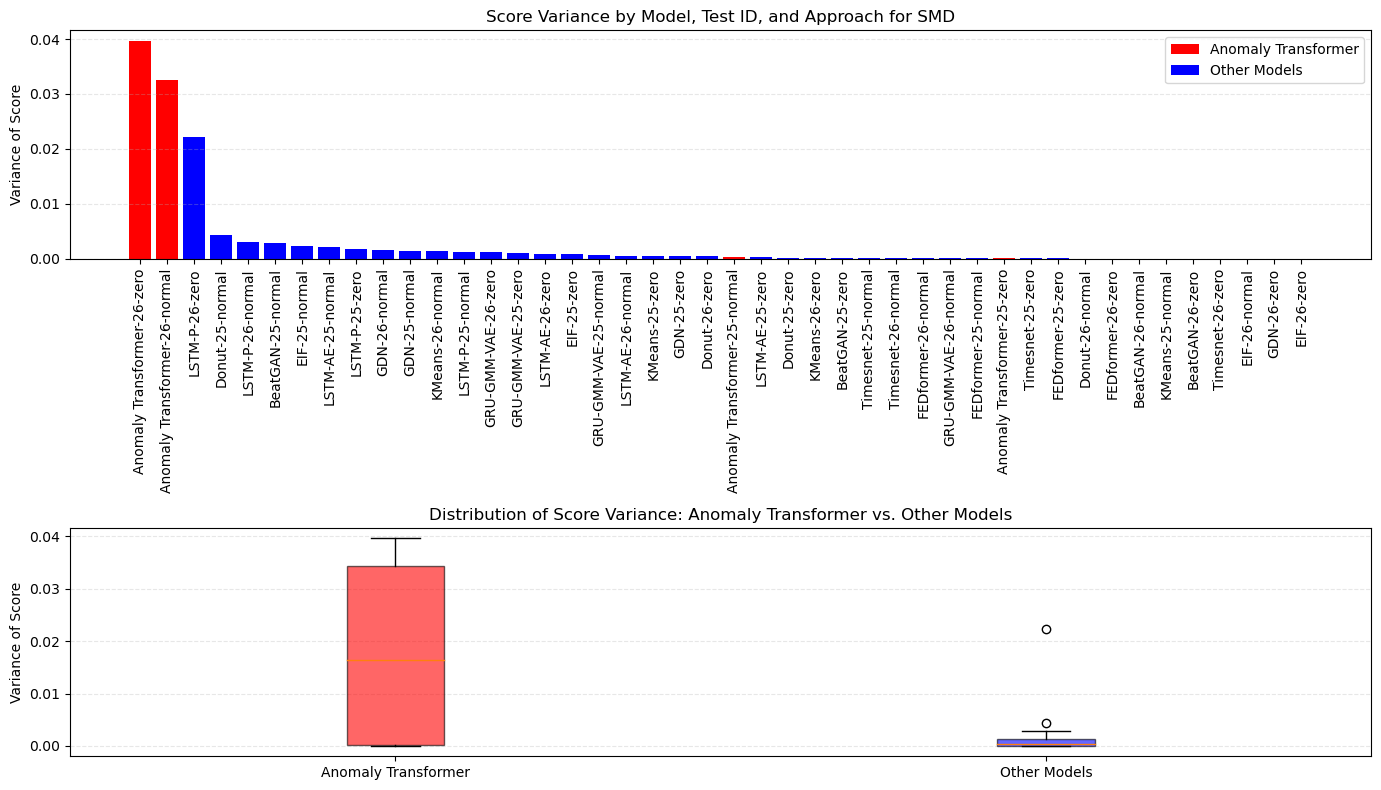


Detailed variance statistics for each model:


,readable_name,test_id,approach,score_mean,score_var,score_std,score_count,cv
3,Anomaly Transformer,26,zero,0.225400,0.039622,0.199054,3,0.883112
2,Anomaly Transformer,26,normal,0.194869,0.032544,0.180399,3,0.925744
39,LSTM-P,26,zero,0.349931,0.022239,0.149126,3,0.426158
8,Donut,25,normal,0.225407,0.004297,0.065553,3,0.290820
38,LSTM-P,26,normal,0.412739,0.002933,0.054157,3,0.131214
4,BeatGAN,25,normal,0.206828,0.002762,0.052555,3,0.254099
12,EIF,25,normal,0.142899,0.002276,0.047706,3,0.333843
32,LSTM-AE,25,normal,0.160135,0.002031,0.045069,3,0.281446
37,LSTM-P,25,zero,0.130482,0.001724,0.041523,3,0.318231
22,GDN,26,normal,0.450456,0.001545,0.039302,3,0.087250



Top 10 models by coefficient of variation (std/mean):


,readable_name,test_id,approach,score_mean,score_std,score_var,cv
2,Anomaly Transformer,26,normal,0.194869,0.180399,0.032544,0.925744
3,Anomaly Transformer,26,zero,0.225400,0.199054,0.039622,0.883112
0,Anomaly Transformer,25,normal,0.037308,0.017056,0.000291,0.457181
39,LSTM-P,26,zero,0.349931,0.149126,0.022239,0.426158
12,EIF,25,normal,0.142899,0.047706,0.002276,0.333843
37,LSTM-P,25,zero,0.130482,0.041523,0.001724,0.318231
8,Donut,25,normal,0.225407,0.065553,0.004297,0.290820
20,GDN,25,normal,0.131654,0.037584,0.001413,0.285473
32,LSTM-AE,25,normal,0.160135,0.045069,0.002031,0.281446
25,GRU-GMM-VAE,25,zero,0.118198,0.033038,0.001091,0.279513



Anomaly Transformer average coefficient of variation: 0.584801
Other models average coefficient of variation: 0.107492
Ratio (Anomaly Transformer / Others): 5.44x

Insight: Anomaly Transformer shows higher variance across seeds compared to other models,
indicating potentially greater sensitivity to initialization conditions.


In [37]:
# Run seed variance analysis for SMD dataset
smd_variance = analyze_seed_variance(df, 'smd', [25, 26])


Seed Variance Analysis for EXATHLON Dataset (Test IDs: [5, 6])

Anomaly Transformer average variance: 0.009330
Other models average variance: 0.001429
Ratio (Anomaly Transformer / Others): 6.53x



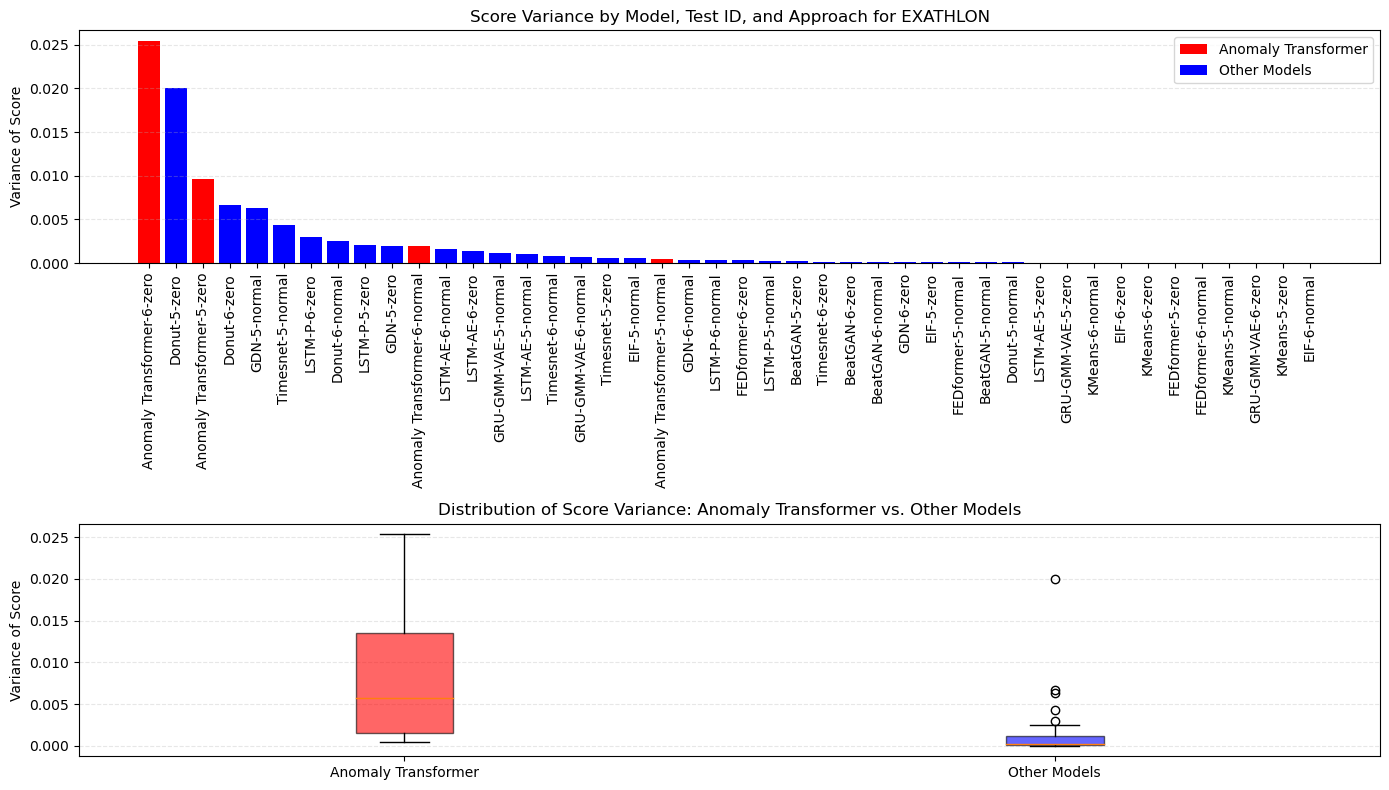


Detailed variance statistics for each model:


,readable_name,test_id,approach,score_mean,score_var,score_std,score_count,cv
3,Anomaly Transformer,6,zero,0.182793,0.025376,0.159298,3,0.871466
9,Donut,5,zero,0.582136,0.020043,0.141574,3,0.243198
1,Anomaly Transformer,5,zero,0.202677,0.009574,0.097848,3,0.482778
11,Donut,6,zero,0.512240,0.006687,0.081775,3,0.159643
20,GDN,5,normal,0.373676,0.006267,0.079166,3,0.211858
40,Timesnet,5,normal,0.448063,0.004299,0.065568,3,0.146338
39,LSTM-P,6,zero,0.466021,0.003022,0.054976,3,0.117968
10,Donut,6,normal,0.520670,0.002474,0.049744,3,0.095538
37,LSTM-P,5,zero,0.366265,0.002092,0.045739,3,0.124881
21,GDN,5,zero,0.427654,0.001984,0.044537,3,0.104142



Top 10 models by coefficient of variation (std/mean):


,readable_name,test_id,approach,score_mean,score_std,score_var,cv
3,Anomaly Transformer,6,zero,0.182793,0.159298,0.025376,0.871466
1,Anomaly Transformer,5,zero,0.202677,0.097848,0.009574,0.482778
9,Donut,5,zero,0.582136,0.141574,0.020043,0.243198
20,GDN,5,normal,0.373676,0.079166,0.006267,0.211858
0,Anomaly Transformer,5,normal,0.114426,0.020649,0.000426,0.180460
11,Donut,6,zero,0.512240,0.081775,0.006687,0.159643
40,Timesnet,5,normal,0.448063,0.065568,0.004299,0.146338
37,LSTM-P,5,zero,0.366265,0.045739,0.002092,0.124881
39,LSTM-P,6,zero,0.466021,0.054976,0.003022,0.117968
21,GDN,5,zero,0.427654,0.044537,0.001984,0.104142



Anomaly Transformer average coefficient of variation: 0.403839
Other models average coefficient of variation: 0.053374
Ratio (Anomaly Transformer / Others): 7.57x

Insight: Anomaly Transformer shows higher variance across seeds compared to other models,
indicating potentially greater sensitivity to initialization conditions.


In [38]:
# Run seed variance analysis for Exathlon dataset
exathlon_variance = analyze_seed_variance(df, 'exathlon', [5, 6])

In [39]:
def compare_variance_across_datasets(smd_variance, exathlon_variance):
    if smd_variance is None or exathlon_variance is None:
        print("Missing variance data for one or both datasets.")
        return

    # Combine datasets with a dataset identifier
    smd_variance['dataset'] = 'SMD'
    exathlon_variance['dataset'] = 'Exathlon'
    combined = pd.concat([smd_variance, exathlon_variance], ignore_index=True)

    # Group by model and dataset
    grouped = combined.groupby(['readable_name', 'dataset']).agg({
        'score_var': ['mean', 'max', 'min'],
        'cv': ['mean', 'max', 'min']
    }).reset_index()

    # Flatten multi-level columns
    grouped.columns = ['_'.join(col).strip('_') for col in grouped.columns.values]

    # Pivot to create a comparison table with datasets as columns - only for CV
    pivot_cv = pd.pivot_table(grouped, values='cv_mean', index='readable_name', columns='dataset')

    # Create a visualization - only for Coefficient of Variation
    plt.figure(figsize=(12, 8))
    # Plot CV comparison with consistent color
    ax = pivot_cv.plot(kind='bar', rot=45)
    plt.title("Average Coefficient of Variation by Model and Dataset")
    plt.ylabel("Coefficient of Variation (std/mean)")
    plt.xlabel("Model")
    plt.legend(title="Dataset")
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Adjust the position of the x-tick labels to align with the bars
    plt.tight_layout()

    # Adjust the x-tick labels position
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')

    plt.show()

    # Display the comparison table for CV
    print("Average Coefficient of Variation (std/mean) by Model and Dataset:")
    display(pivot_cv)

    # Highlight Anomaly Transformer specifically
    if 'Anomaly Transformer' in pivot_cv.index:
        print("\nAnomaly Transformer Comparison:")
        for dataset in pivot_cv.columns:
            print(f"{dataset} CV: {pivot_cv.loc['Anomaly Transformer', dataset]:.6f}")

        # Calculate how much higher Anomaly Transformer's CV is compared to others
        avg_values = {}
        for dataset in pivot_cv.columns:
            others_mean = pivot_cv.drop('Anomaly Transformer').mean()[dataset]
            anomaly_value = pivot_cv.loc['Anomaly Transformer', dataset]
            ratio = anomaly_value / others_mean if others_mean > 0 else float('inf')
            avg_values[dataset] = (others_mean, ratio)

        print("\nComparison to other models:")
        for dataset, (others_mean, ratio) in avg_values.items():
            print(f"{dataset}: Anomaly Transformer CV is {ratio:.2f}x the average of other models ({others_mean:.6f})")

        # Find model with lowest CV for each dataset
        for dataset in pivot_cv.columns:
            min_model = pivot_cv[dataset].idxmin()
            min_value = pivot_cv.loc[min_model, dataset]
            print(f"\nMost stable model on {dataset}: {min_model} (CV: {min_value:.6f})")
            print(f"Anomaly Transformer is {pivot_cv.loc['Anomaly Transformer', dataset] / min_value:.2f}x less stable than the best model")

<Figure size 1200x800 with 0 Axes>

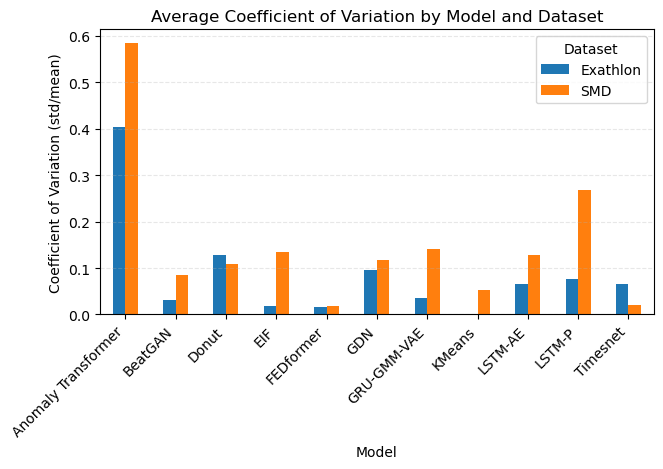

Average Coefficient of Variation (std/mean) by Model and Dataset:


dataset,Exathlon,SMD
readable_name,,
Anomaly Transformer,0.403839,0.584801
BeatGAN,0.031126,0.085705
Donut,0.128487,0.108089
EIF,0.017634,0.135398
FEDformer,0.016532,0.017293
GDN,0.095728,0.117360
GRU-GMM-VAE,0.035173,0.141688
KMeans,0.000816,0.051988
LSTM-AE,0.065680,0.128491



Anomaly Transformer Comparison:
Exathlon CV: 0.403839
SMD CV: 0.584801

Comparison to other models:
Exathlon: Anomaly Transformer CV is 7.57x the average of other models (0.053374)
SMD: Anomaly Transformer CV is 5.44x the average of other models (0.107492)

Most stable model on Exathlon: KMeans (CV: 0.000816)
Anomaly Transformer is 494.91x less stable than the best model

Most stable model on SMD: FEDformer (CV: 0.017293)
Anomaly Transformer is 33.82x less stable than the best model


In [40]:
# Compare variance results across datasets
compare_variance_across_datasets(smd_variance, exathlon_variance)

# Normal vs Zero-Shot Performance by Method Type

This section creates a visualization comparing normal vs zero-shot performance, highlighting the difference between shallow and deep learning methods.

In [41]:
def plot_normal_vs_zero_by_method_type(df, dataset, test_ids, show_identity_line=True, annotate_points=True):
    """Plot comparison of Normal vs Zero-shot performance, differentiating between shallow and deep methods.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing experiment results
    dataset : str
        Name of the dataset (e.g., 'smd', 'exathlon')
    test_ids : list
        List of test IDs to include
    show_identity_line : bool
        Whether to show the identity line (y=x)
    annotate_points : bool
        Whether to add labels to each point
    """
    # Extract data for normal and zero-shot approaches
    normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
    zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)

    # Get mean scores per experiment
    normal_means = normal_data.groupby('experiment').mean()['score'].reset_index()
    zero_means = zero_data.groupby('experiment').mean()['score'].reset_index()

    # Merge the data
    merged_data = pd.merge(normal_means, zero_means, on='experiment', suffixes=('_normal', '_zero'))

    # Add readable names and method types
    merged_data['readable_name'] = merged_data['experiment'].apply(get_readable_name)
    merged_data['method_type'] = merged_data['readable_name'].apply(classify_method_type)

    # Create figure and set size
    plt.figure(figsize=(10, 8))

    # Split data by method type
    shallow_methods = merged_data[merged_data['method_type'] == 'Shallow']
    deep_methods = merged_data[merged_data['method_type'] == 'Deep']

    # Plot points with different markers and colors for shallow vs deep methods
    plt.scatter(shallow_methods['score_normal'], shallow_methods['score_zero'],
               color='red', s=100, alpha=0.7, label='Shallow Methods', marker='o')
    plt.scatter(deep_methods['score_normal'], deep_methods['score_zero'],
               color='blue', s=100, alpha=0.7, label='Deep Methods', marker='^')

    # Add identity line if requested
    if show_identity_line:
        min_val = min(merged_data['score_normal'].min(), merged_data['score_zero'].min()) - 0.05
        max_val = max(merged_data['score_normal'].max(), merged_data['score_zero'].max()) + 0.05
        plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)

    # Annotate points if requested
    if annotate_points:
        for _, row in merged_data.iterrows():
            plt.annotate(row['readable_name'],
                        (row['score_normal'], row['score_zero']),
                        textcoords='offset points',
                        xytext=(0, 5),
                        ha='center')

    # Set labels and title
    plt.xlabel('Normal Performance')
    plt.ylabel('Zero-Shot Performance')
    plt.title(f'Normal vs Zero-Shot Performance by Method Type - {dataset.upper()}')

    # Add grid and legend
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Ensure axes start at the same point and have the same scale if possible
    min_axis = min(plt.xlim()[0], plt.ylim()[0])
    max_axis = max(plt.xlim()[1], plt.ylim()[1])
    plt.xlim(min_axis, max_axis)
    plt.ylim(min_axis, max_axis)

    plt.tight_layout()
    plt.show()

    # Create a table with detailed performance data
    print(f"\nPerformance comparison for {dataset.upper()} dataset, test IDs {test_ids}:\n")

    # Add performance difference and sort by method type then by normal performance
    merged_data['diff'] = merged_data['score_zero'] - merged_data['score_normal']
    merged_data['diff_percent'] = (merged_data['diff'] / merged_data['score_normal']) * 100
    display_df = merged_data.sort_values(['method_type', 'score_normal'], ascending=[True, False])

    # Format and display the table
    display_columns = ['readable_name', 'method_type', 'score_normal', 'score_zero', 'diff', 'diff_percent']
    formatted_df = display_df[display_columns].copy()
    formatted_df.columns = ['Model', 'Method Type', 'Normal Perf', 'Zero-Shot Perf', 'Difference', '% Change']
    formatted_df = formatted_df.round({'Normal Perf': 4, 'Zero-Shot Perf': 4, 'Difference': 4, '% Change': 2})

    # Add a summary of method type performance
    shallow_summary = merged_data[merged_data['method_type'] == 'Shallow']
    deep_summary = merged_data[merged_data['method_type'] == 'Deep']

    shallow_avg_normal = shallow_summary['score_normal'].mean() if not shallow_summary.empty else 0
    shallow_avg_zero = shallow_summary['score_zero'].mean() if not shallow_summary.empty else 0
    deep_avg_normal = deep_summary['score_normal'].mean() if not deep_summary.empty else 0
    deep_avg_zero = deep_summary['score_zero'].mean() if not deep_summary.empty else 0

    print(f"Average performance by method type:")
    print(f"Shallow methods - Normal: {shallow_avg_normal:.4f}, Zero-Shot: {shallow_avg_zero:.4f}, Diff: {shallow_avg_zero - shallow_avg_normal:.4f}")
    print(f"Deep methods - Normal: {deep_avg_normal:.4f}, Zero-Shot: {deep_avg_zero:.4f}, Diff: {deep_avg_zero - deep_avg_normal:.4f}\n")

    return formatted_df

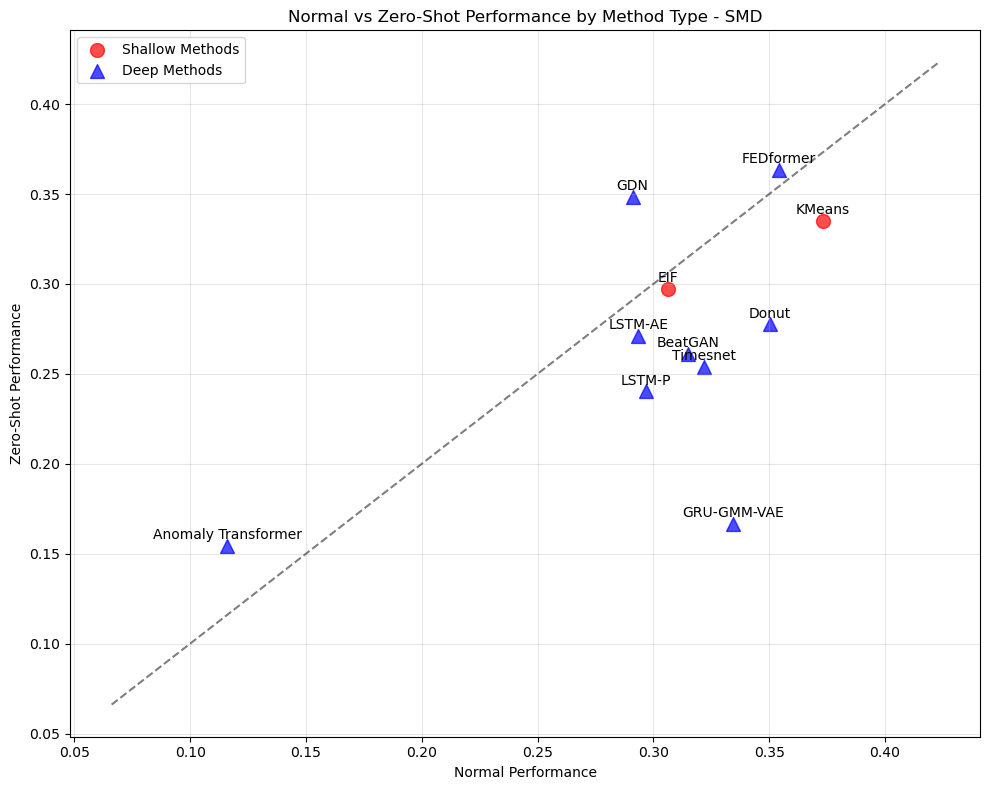


Performance comparison for SMD dataset, test IDs [25, 26]:

Average performance by method type:
Shallow methods - Normal: 0.3398, Zero-Shot: 0.3160, Diff: -0.0238
Deep methods - Normal: 0.2970, Zero-Shot: 0.2595, Diff: -0.0375



,Model,Method Type,Normal Perf,Zero-Shot Perf,Difference,% Change
4,FEDformer,Deep,0.3543,0.3635,0.0092,2.60
2,Donut,Deep,0.3504,0.2775,-0.0729,-20.82
6,GRU-GMM-VAE,Deep,0.3343,0.1665,-0.1678,-50.20
10,Timesnet,Deep,0.3217,0.2538,-0.0679,-21.11
1,BeatGAN,Deep,0.3151,0.2610,-0.0541,-17.16
9,LSTM-P,Deep,0.2970,0.2402,-0.0568,-19.11
8,LSTM-AE,Deep,0.2935,0.2709,-0.0225,-7.68
5,GDN,Deep,0.2911,0.3484,0.0573,19.70
0,Anomaly Transformer,Deep,0.1161,0.1541,0.0380,32.71
7,KMeans,Shallow,0.3732,0.3348,-0.0384,-10.28


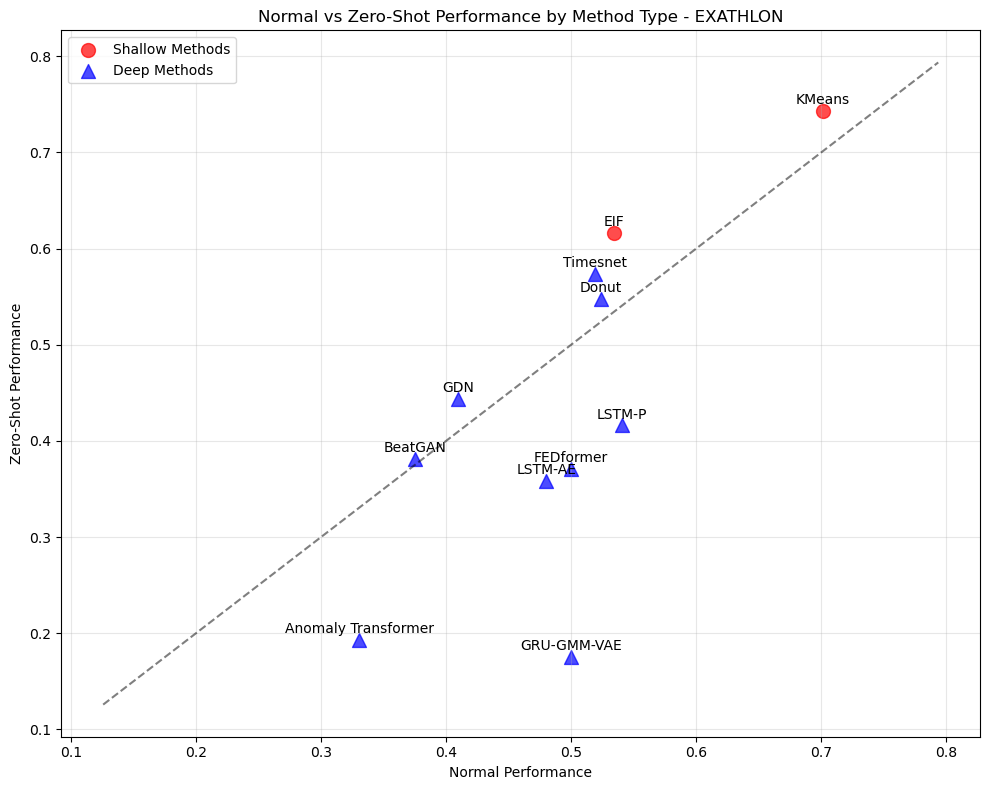


Performance comparison for EXATHLON dataset, test IDs [5, 6]:

Average performance by method type:
Shallow methods - Normal: 0.6177, Zero-Shot: 0.6800, Diff: 0.0624
Deep methods - Normal: 0.4643, Zero-Shot: 0.3843, Diff: -0.0801



,Model,Method Type,Normal Perf,Zero-Shot Perf,Difference,% Change
9,LSTM-P,Deep,0.5405,0.4161,-0.1243,-23.01
2,Donut,Deep,0.5241,0.5472,0.0231,4.40
10,Timesnet,Deep,0.5189,0.5733,0.0544,10.49
4,FEDformer,Deep,0.5001,0.3706,-0.1294,-25.88
6,GRU-GMM-VAE,Deep,0.4998,0.1759,-0.3239,-64.81
8,LSTM-AE,Deep,0.4803,0.3581,-0.1222,-25.44
5,GDN,Deep,0.4099,0.4432,0.0333,8.11
1,BeatGAN,Deep,0.3750,0.3814,0.0064,1.70
0,Anomaly Transformer,Deep,0.3305,0.1927,-0.1377,-41.68
7,KMeans,Shallow,0.7013,0.7436,0.0423,6.03


In [42]:
smd_table = plot_normal_vs_zero_by_method_type(df, 'smd', [25, 26])
display(smd_table)
exathlon_table = plot_normal_vs_zero_by_method_type(df, 'exathlon', [5, 6])
display(exathlon_table)

In [43]:
def plot_stacked_experiment_comparison(df, dataset, test_ids, sort_by='name'):
    """Plot comparison of Normal vs Zero-shot approaches with stacked subplots for each test ID.

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing experiment results
    dataset : str
        Name of the dataset (e.g., 'smd', 'exathlon')
    test_ids : list
        List of test IDs to include in the plots
    sort_by : str
        Method to sort model names ('diff' for difference between approaches or 'name' for alphabetical)
    """
    # Set up the figure with stacked subplots
    fig, axes = plt.subplots(len(test_ids), 1, figsize=(14, 6 * len(test_ids)))

    # Handle case with single test_id
    if len(test_ids) == 1:
        axes = [axes]

    # Get overall sorting order to keep it consistent across subplots
    all_normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
    all_zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)
    experiments = sorted(all_normal_data['experiment'].unique())

    # Prepare overall statistics for sorting
    overall_stats = []
    for exp in experiments:
        normal_scores = all_normal_data[all_normal_data['experiment'] == exp]['score']
        zero_scores = all_zero_data[all_zero_data['experiment'] == exp]['score']
        readable_name = get_readable_name(exp)
        overall_stats.append({
            'experiment': exp,
            'readable_name': readable_name,
            'normal_mean': normal_scores.mean(),
            'zero_mean': zero_scores.mean(),
            'diff': zero_scores.mean() - normal_scores.mean()
        })

    # Create DataFrame and sort as specified
    overall_df = pd.DataFrame(overall_stats)
    if sort_by == 'diff':
        overall_df = overall_df.sort_values('diff', ascending=False)
    else:
        overall_df = overall_df.sort_values('readable_name')

    # Get the ordered list of readable names for consistent x-axis order
    ordered_names = overall_df['readable_name'].tolist()

    # Process each test ID in a separate subplot
    for idx, test_id in enumerate(test_ids):
        ax = axes[idx]

        # Extract data for this specific test ID
        normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=[test_id])
        zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=[test_id])

        # Calculate statistics for each experiment for this test ID
        stats_data = []
        for exp in experiments:
            normal_scores = normal_data[normal_data['experiment'] == exp]['score']
            zero_scores = zero_data[zero_data['experiment'] == exp]['score']

            # Skip if no data for this experiment
            if len(normal_scores) == 0 or len(zero_scores) == 0:
                continue

            readable_name = get_readable_name(exp)
            stats_data.append({
                'experiment': exp,
                'readable_name': readable_name,
                'normal_mean': normal_scores.mean(),
                'zero_mean': zero_scores.mean(),
                'diff': zero_scores.mean() - normal_scores.mean()
            })

        # Create DataFrame for this test ID
        stats_df = pd.DataFrame(stats_data)

        # Create a dictionary mapping readable names to their values for quick lookup
        normal_values = {row['readable_name']: row['normal_mean'] for _, row in stats_df.iterrows()}
        zero_values = {row['readable_name']: row['zero_mean'] for _, row in stats_df.iterrows()}

        # Use the consistent ordering from overall stats
        # Only include models that have data for this test ID
        x_labels = []
        normal_scores_ordered = []
        zero_scores_ordered = []

        for name in ordered_names:
            if name in normal_values and name in zero_values:
                x_labels.append(name)
                normal_scores_ordered.append(normal_values[name])
                zero_scores_ordered.append(zero_values[name])

        # Set bar positions
        x = np.arange(len(x_labels))
        bar_width = 0.35

        # Create the bars
        rects1 = ax.bar(x - bar_width/2, zero_scores_ordered, bar_width, color='blue', alpha=0.7, label='Zero-shot')
        rects2 = ax.bar(x + bar_width/2, normal_scores_ordered, bar_width, color='red', alpha=0.7, label='Normal')

        # Add labels and title for this subplot
        ax.set_ylabel('Mean Score')
        preview_test_id = test_id+1 if dataset == 'smd' else test_id
        ax.set_title(f'{dataset.upper()}-{preview_test_id}')

        # Set x-ticks consistently for all subplots
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')

        # Add x-label only on the bottom subplot
        if idx == len(test_ids) - 1:
            ax.set_xlabel('Model')

        # Add a legend to each subplot
        ax.legend(loc='upper left')

        # Add grid for readability
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Make sure plots don't share x-axis to avoid label issues
    plt.subplots_adjust(hspace=0.6)  # Increased spacing between subplots

    # Set a common title for the entire figure
    fig.suptitle(f'Mean Performance Comparison: Zero-shot vs. Normal on {dataset.upper()}',
                 fontsize=16, fontweight='bold', y=0.98)

    # Adjust layout to ensure all labels are visible
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)

    plt.show()

    # Return the statistics dataframes
    return overall_df

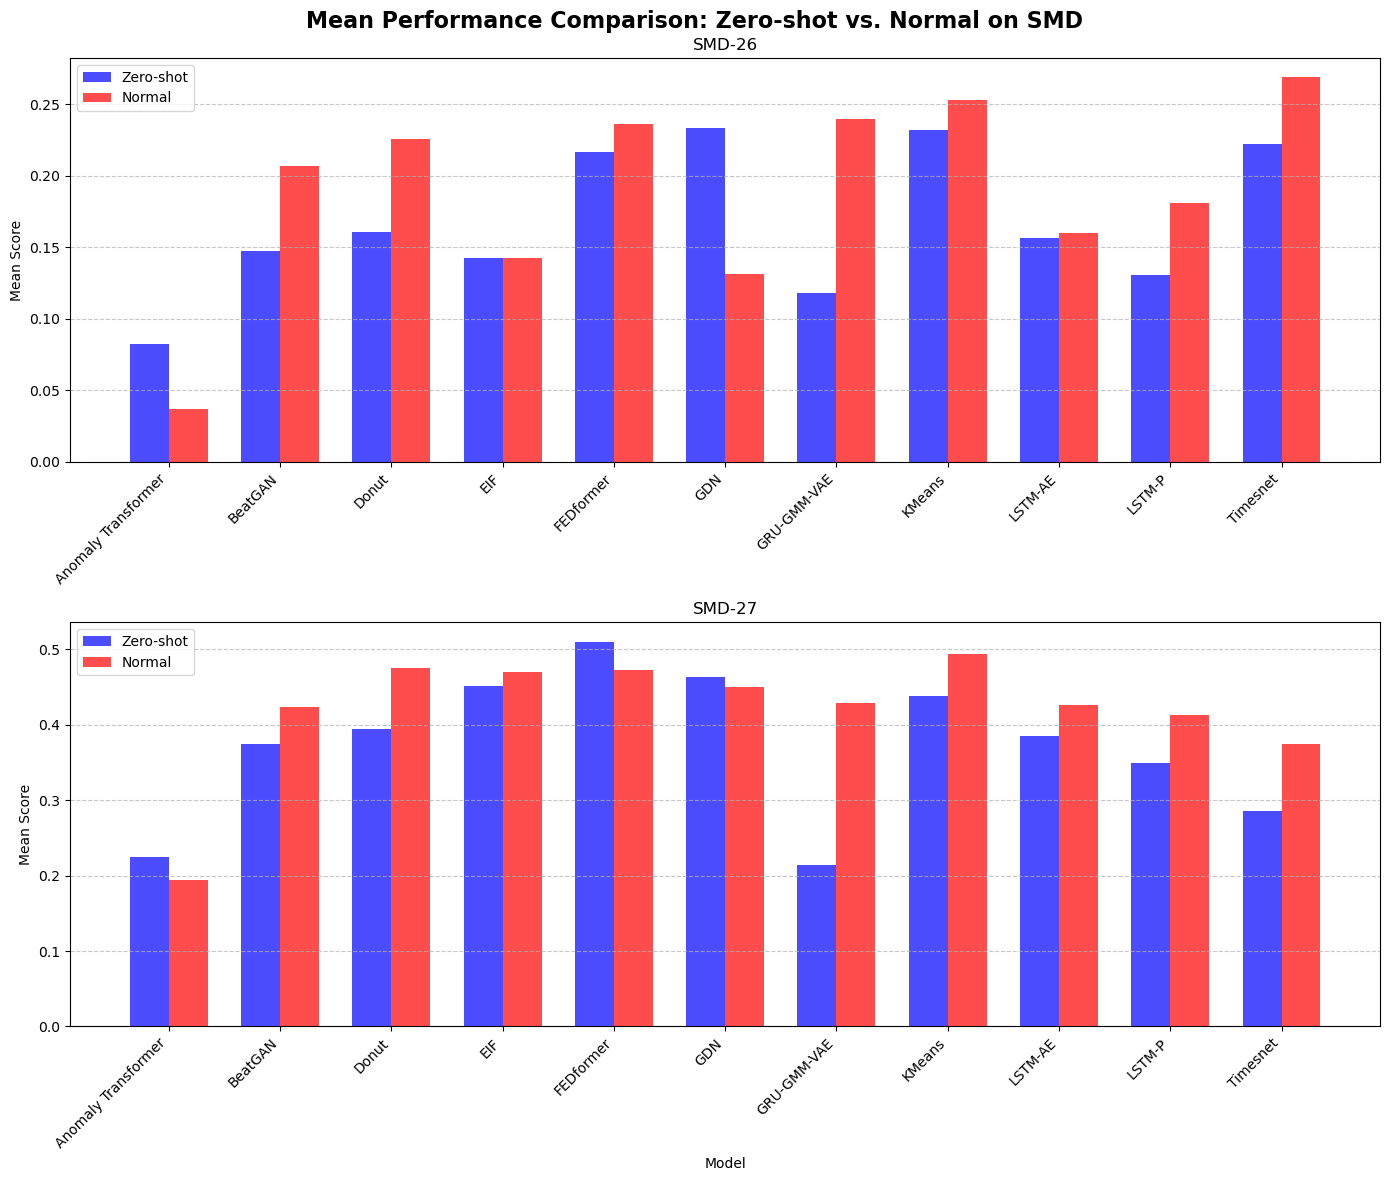

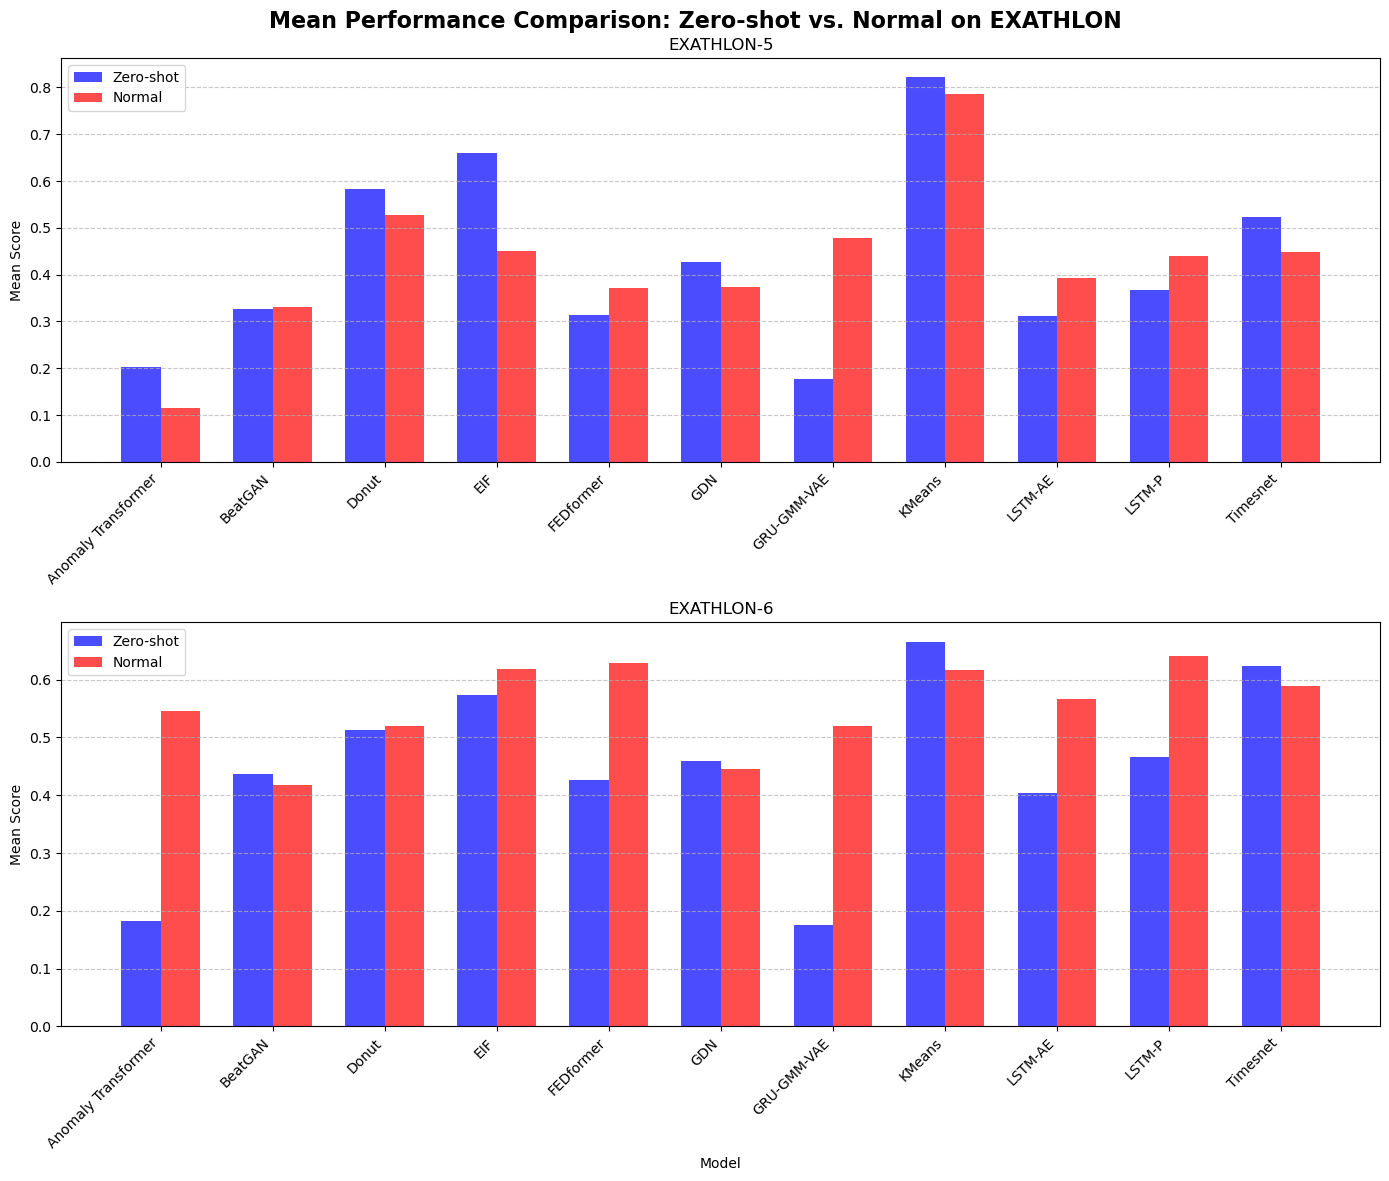

In [44]:
smd_stats = plot_stacked_experiment_comparison(df, 'smd', [25, 26])
exathlon_stats = plot_stacked_experiment_comparison(df, 'exathlon', [5, 6])

In [45]:
def plot_stacked_difference_comparison(df, dataset, test_ids, sort_by='diff'):
    """Plot stacked visualizations of the performance difference between Zero-shot and Normal approaches.

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing experiment results
    dataset : str
        Name of the dataset (e.g., 'smd', 'exathlon')
    test_ids : list
        List of test IDs to include in the plots
    sort_by : str
        How to sort the models: 'diff' (by difference magnitude) or 'name' (alphabetically)
        Note: When using 'diff', each subplot will be sorted by its own differences
    """
    # Set up the figure with stacked subplots
    fig, axes = plt.subplots(len(test_ids), 1, figsize=(14, 6 * len(test_ids)))

    # Handle case with single test_id
    if len(test_ids) == 1:
        axes = [axes]

    # Get overall sorting order to keep it consistent across subplots
    all_normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=test_ids)
    all_zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=test_ids)
    experiments = sorted(all_normal_data['experiment'].unique())

    # Prepare overall statistics for sorting
    overall_stats = []
    for exp in experiments:
        normal_scores = all_normal_data[all_normal_data['experiment'] == exp]['score']
        zero_scores = all_zero_data[all_zero_data['experiment'] == exp]['score']
        readable_name = get_readable_name(exp)
        overall_stats.append({
            'experiment': exp,
            'readable_name': readable_name,
            'normal_mean': normal_scores.mean(),
            'zero_mean': zero_scores.mean(),
            'diff': zero_scores.mean() - normal_scores.mean()
        })

    # Create DataFrame for overall stats
    overall_df = pd.DataFrame(overall_stats)
    if sort_by == 'diff':
        overall_df = overall_df.sort_values('diff', ascending=False)
    else:
        overall_df = overall_df.sort_values('readable_name')

    # Get the ordered list of readable names for consistent x-axis order
    ordered_names = overall_df['readable_name'].tolist()

    # Process each test ID in a separate subplot
    for idx, test_id in enumerate(test_ids):
        ax = axes[idx]

        # Extract data for this specific test ID
        normal_data = plot_utils.extract_results(df, dataset=dataset, type='normal', test_ids=[test_id])
        zero_data = plot_utils.extract_results(df, dataset=dataset, type='zero', test_ids=[test_id])

        # Calculate statistics for each experiment for this test ID
        stats_data = []
        for exp in experiments:
            normal_scores = normal_data[normal_data['experiment'] == exp]['score']
            zero_scores = zero_data[zero_data['experiment'] == exp]['score']

            # Skip if no data for this experiment
            if len(normal_scores) == 0 or len(zero_scores) == 0:
                continue

            readable_name = get_readable_name(exp)
            stats_data.append({
                'experiment': exp,
                'readable_name': readable_name,
                'normal_mean': normal_scores.mean(),
                'zero_mean': zero_scores.mean(),
                'diff': zero_scores.mean() - normal_scores.mean()
            })

        # Create DataFrame for this test ID
        stats_df = pd.DataFrame(stats_data)

        # Sort values based on the specified method for this specific subplot
        if sort_by == 'diff':
            stats_df = stats_df.sort_values('diff', ascending=False)
        else:
            stats_df = stats_df.sort_values('readable_name')

        # Get the ordered names and values for this subplot
        x_labels = stats_df['readable_name'].tolist()
        diff_values = stats_df['diff'].tolist()

        # Set bar colors based on positive/negative differences
        colors = ['green' if val >= 0 else 'red' for val in diff_values]

        # Create the bars
        bars = ax.bar(x_labels, diff_values, color=colors)

        # Add a horizontal line at y=0
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)

        # Add labels and title for this subplot
        ax.set_ylabel('Performance Difference\n(Zero-shot - Normal)')
        preview_test_id = test_id+1 if dataset == 'smd' else test_id
        ax.set_title(f'{dataset.upper()}-{preview_test_id}')

        # Set x-ticks rotation
        plt.sca(ax)
        plt.xticks(rotation=45, ha='right')

        # Add x-label only on the bottom subplot
        if idx == len(test_ids) - 1:
            ax.set_xlabel('Model')

        # Add grid for readability
        ax.grid(axis='y', linestyle='--', alpha=0.7)

        # # Annotate with some statistics
        # positive_count = sum(1 for val in diff_values if val > 0)
        # total_count = len(diff_values)
        # annotation_text = f"Models better in zero-shot: {positive_count}/{total_count} ({positive_count/total_count*100:.1f}%)"
        # ax.annotate(annotation_text, xy=(0.02, 0.95), xycoords='axes fraction', fontsize=10,
        #            backgroundcolor='white', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

    # Make sure plots don't share x-axis to avoid label issues
    plt.subplots_adjust(hspace=0.6)  # Increased spacing between subplots

    # Set a common title for the entire figure
    fig.suptitle(f'Performance Difference (Zero-shot minus Normal) on {dataset.upper()}',
                 fontsize=16, fontweight='bold', y=0.98)

    # Adjust layout to ensure all labels are visible
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)

    plt.show()

    # Summarize the results across test IDs
    print(f"\nOverall summary for {dataset.upper()}:")
    print(f"Models better in zero-shot across all test IDs: {sum(overall_df['diff'] > 0)}/{len(overall_df)} ({sum(overall_df['diff'] > 0)/len(overall_df)*100:.1f}%)")

    # Calculate average difference
    avg_diff = overall_df['diff'].mean()
    print(f"Average difference (Zero-shot - Normal): {avg_diff:.4f}")

    # Display top 3 models that benefit most from zero-shot
    benefit_models = overall_df.sort_values('diff', ascending=False).head(3)
    print(f"\nTop 3 models that benefit most from zero-shot:")
    for _, row in benefit_models.iterrows():
        print(f"  {row['readable_name']}: +{row['diff']:.4f}")

    # Display top 3 models that suffer most in zero-shot
    suffer_models = overall_df.sort_values('diff', ascending=True).head(3)
    print(f"\nTop 3 models that perform worse in zero-shot:")
    for _, row in suffer_models.iterrows():
        print(f"  {row['readable_name']}: {row['diff']:.4f}")

    return overall_df

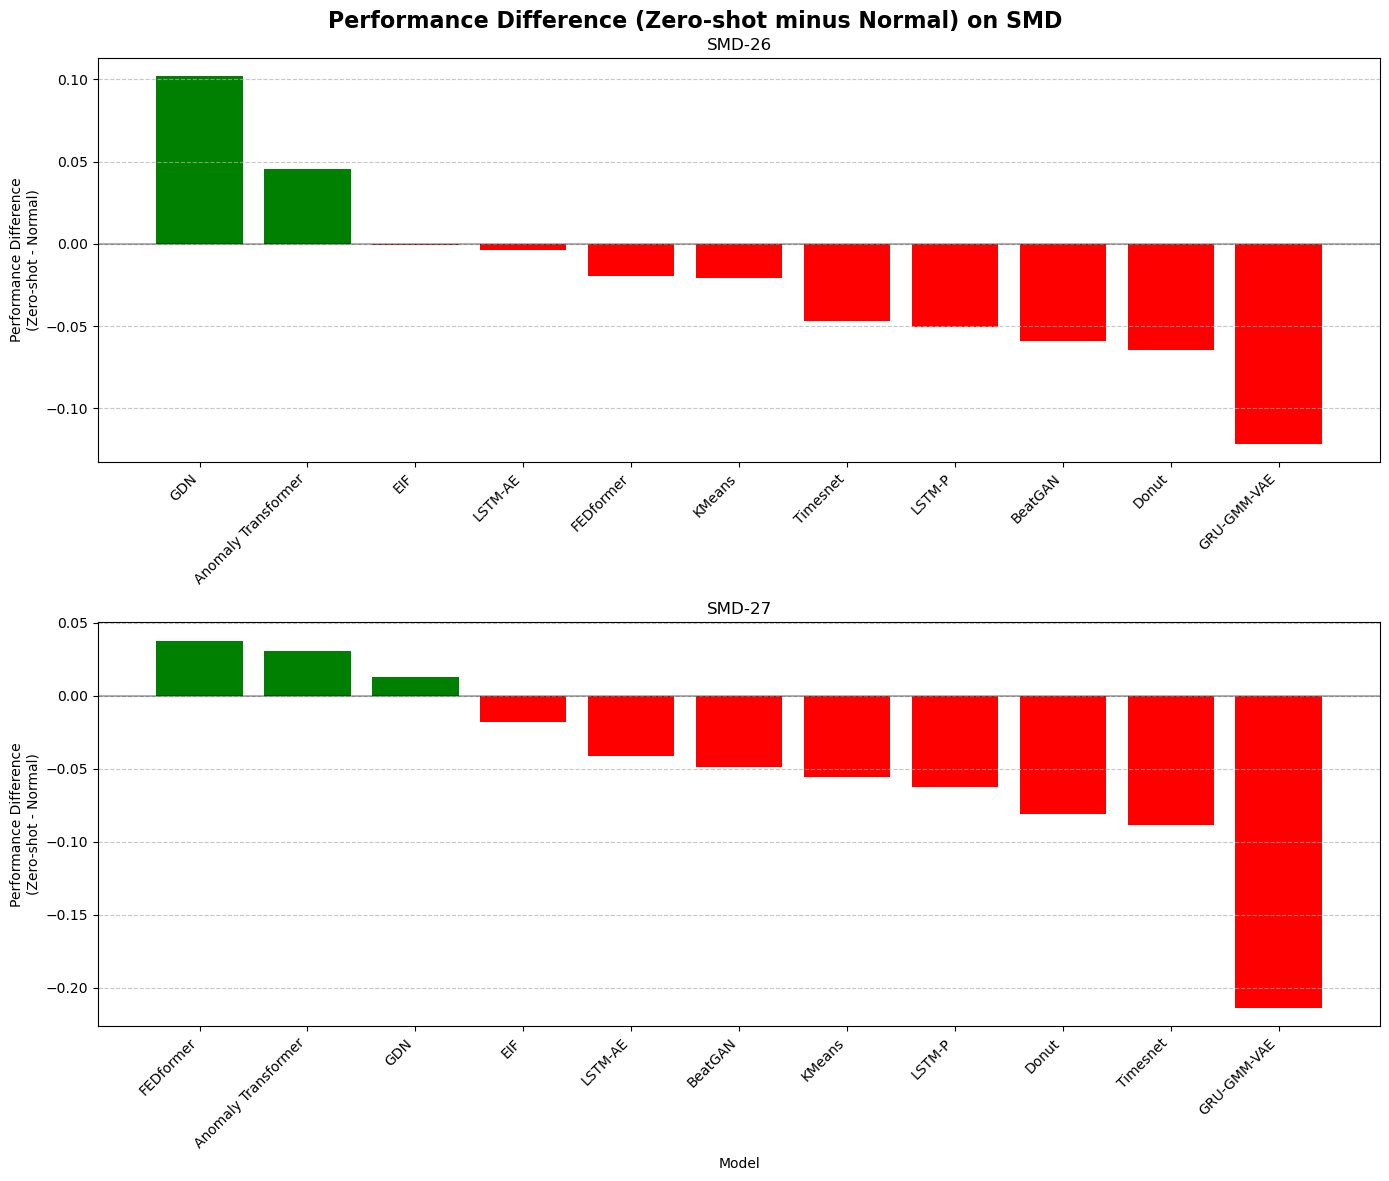


Overall summary for SMD:
Models better in zero-shot across all test IDs: 3/11 (27.3%)
Average difference (Zero-shot - Normal): -0.0350

Top 3 models that benefit most from zero-shot:
  GDN: +0.0573
  Anomaly Transformer: +0.0380
  FEDformer: +0.0092

Top 3 models that perform worse in zero-shot:
  GRU-GMM-VAE: -0.1678
  Donut: -0.0729
  Timesnet: -0.0679


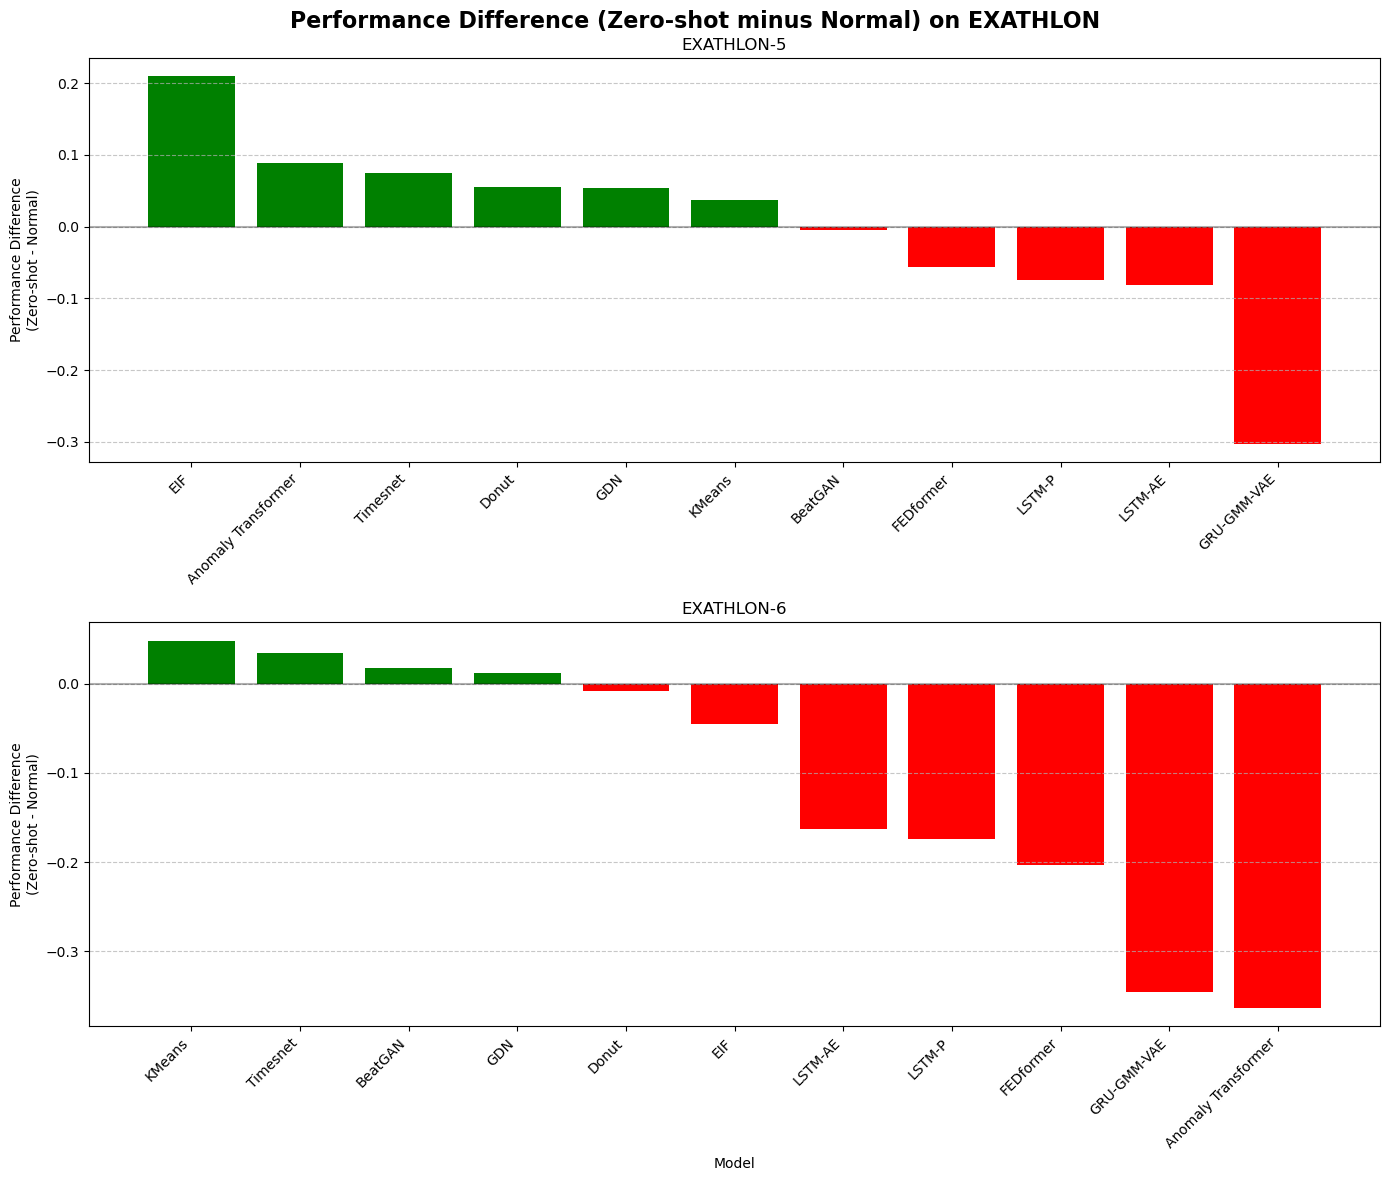


Overall summary for EXATHLON:
Models better in zero-shot across all test IDs: 6/11 (54.5%)
Average difference (Zero-shot - Normal): -0.0542

Top 3 models that benefit most from zero-shot:
  EIF: +0.0825
  Timesnet: +0.0544
  KMeans: +0.0423

Top 3 models that perform worse in zero-shot:
  GRU-GMM-VAE: -0.3239
  Anomaly Transformer: -0.1377
  FEDformer: -0.1294


,experiment,readable_name,normal_mean,zero_mean,diff
3,eif,EIF,0.534006,0.616456,0.082451
10,timesnet,Timesnet,0.518865,0.573276,0.054412
7,kmeans,KMeans,0.701300,0.743615,0.042315
5,gdn,GDN,0.409937,0.443190,0.033253
2,donut,Donut,0.524124,0.547188,0.023064
1,beatgan,BeatGAN,0.374996,0.381361,0.006365
8,lstm_ae,LSTM-AE,0.480291,0.358087,-0.122203
9,lstm_p,LSTM-P,0.540485,0.416143,-0.124342
4,fedformer,FEDformer,0.500082,0.370643,-0.129438
0,anomaly_transformer,Anomaly Transformer,0.330451,0.192735,-0.137716


In [46]:
plot_stacked_difference_comparison(df, 'smd', [25, 26])
plot_stacked_difference_comparison(df, 'exathlon', [5, 6])